# **Notebook 2: DataPrep**

*Equipo ML Ops*

Ángel Azahel Ramírez Cabello | A01383328

Annette Pamela Ruiz Abreu  | A01423595

Luis Angel López Chávez   | A01571000

Jorge Raúl Rocha López   | A01740816

Gadiel Gerardo Wisar Sotelo | A00834274


-----------------------------

## 1. Librerías

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#!pip install ydata_profiling
from ydata_profiling import ProfileReport
#!pip install openpyxl
import openpyxl
import scipy.stats as stats


d:\claseMreporeto\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Data Import

La descarga de datos se hizo accediendo a la conexión de la base de datos del socioformador y haciendo un select * de las tablas para poder inspeccionarlas, limpiarlas y crear los archivos finales que se usarán en el proyecto.

Conexión a la base de datos:

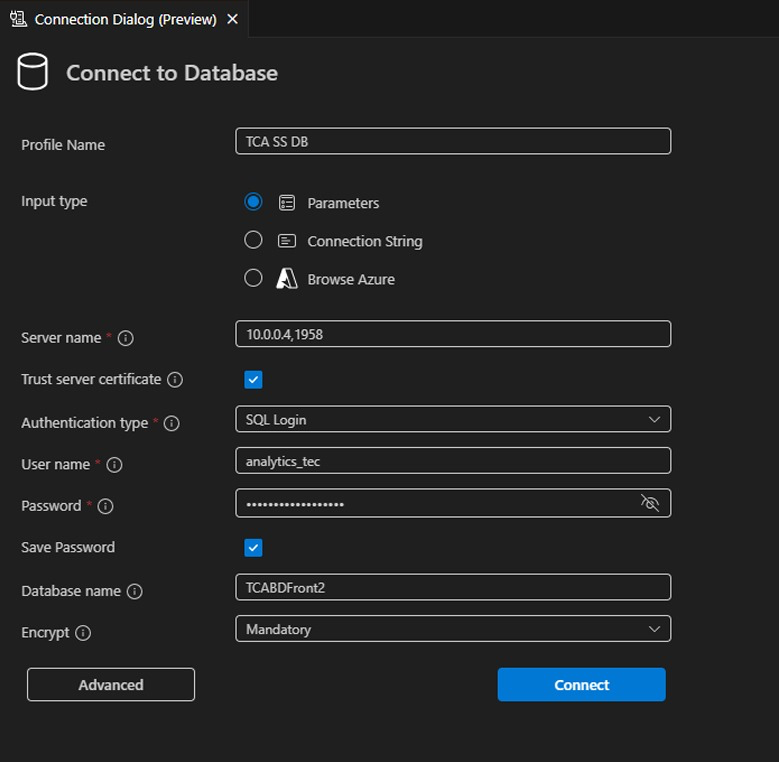


Ejemplo de Query:

SELECT *

FROM [TCABDFront2].[dbo].[iar_Ocupaciones];


### 2.1 Tablas

* iar_Reservaciones.csv

* iar_Ocupacion.csv

* iar_empresas.csv

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
folder_path = '../data/'

reservaciones_name = 'iar_Reservaciones'
ocupaciones_gigante_name = 'iar_Ocupacion'
empresas_name = 'iar_empresas'

reservaciones = os.path.join(folder_path, reservaciones_name+".csv")
ocupaciones_gigante = os.path.join(folder_path, ocupaciones_gigante_name+".csv")
empresas = os.path.join(folder_path, empresas_name+".csv")

reservaciones = pd.read_csv(reservaciones)
ocupaciones_gigante = pd.read_csv(ocupaciones_gigante)
empresas = pd.read_csv(empresas)

C:\Users\angel\AppData\Local\Temp\ipykernel_25452\125184480.py:11: DtypeWarning: Columns (22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  reservaciones = pd.read_csv(reservaciones)


### 2.2 Initial Data Profile

esto solo se ejecuta una vez para generar los archivos .html de data profile

In [41]:
#profile_report = ProfileReport(reservaciones, title=f"Profiling Report {reservaciones_name}")
#profile_report.to_file(f"Profile_report_{reservaciones_name}.html")

#profile_report = ProfileReport(ocupaciones, title=f"Profiling Report {ocupaciones_name}")
#profile_report.to_file(f"Profile_report_{ocupaciones_name}.html")

#profile_report = ProfileReport(ocupaciones_gigante, title=f"Profiling Report {ocupaciones_gigante_name}")
#profile_report.to_file(f"Profile_report_{ocupaciones_gigante_name}.html")

## 3. DataPrep

----------------------------------------------------
### Tabla **Reservaciones**
----------------------------------------------------

*Dimensiones*
- ID_Reserva: Identifier de la reserva
- h_res_fec_ok: Fecha de reserva
- h_fec_lld_ok: Fecha de ingreso o check-in.
- h_fec_sda_ok: Fecha de salida o check-out.
- ID_Paquete
- ID_Segmento_Comp
- ID_Agencia
- ID_Tipo_Habitacion
- ID_canal
- ID_estatus_reservaciones
- ID_empresa


*Métricas*
- h_num_per: Número de personas en la reserva. Esta métrica será igual a 0 si la reserva fue cancelada.
- h_num_noc: Número de noches reservadas. Esta métrica será igual a 0 si la reserva fue cancelada.
- h_tot_hab: Número de habitaciones reservadas. Esta métrica será igual a 0 si la reserva fue cancelada.


In [42]:
dimensiones = ['ID_Reserva', 'h_res_fec_ok', 'h_fec_lld_ok', 'h_fec_sda_ok', 'ID_Paquete', 'ID_Segmento_Comp',
                  'ID_Agencia', 'ID_Tipo_Habitacion', 'ID_canal', 'ID_estatus_reservaciones', 'ID_empresa']
metricas = ['h_num_per', 'h_num_noc', 'h_tot_hab']

df = reservaciones[dimensiones+metricas].copy()

In [6]:
print('--------------------------------- DATA FRAME SHAPE: ---------------------------------')
print(df.shape)
print('--------------------------------- DATA FRAME SCHEMA: ---------------------------------')
print(df.dtypes)
print('--------------------------------- DATA FRAME HEAD: ---------------------------------')
display(df.head(5))
print('--------------------------------- DATA FRAME SUMMARY: ---------------------------------')
display(df.describe())



--------------------------------- DATA FRAME SHAPE: ---------------------------------
(203002, 14)
--------------------------------- DATA FRAME SCHEMA: ---------------------------------
ID_Reserva                   int64
h_res_fec_ok                object
h_fec_lld_ok                object
h_fec_sda_ok                object
ID_Paquete                   int64
ID_Segmento_Comp             int64
ID_Agencia                   int64
ID_Tipo_Habitacion           int64
ID_canal                     int64
ID_estatus_reservaciones     int64
ID_empresa                   int64
h_num_per                    int64
h_num_noc                    int64
h_tot_hab                    int64
dtype: object
--------------------------------- DATA FRAME HEAD: ---------------------------------


ID_Reserva h_res_fec_ok h_fec_lld_ok h_fec_sda_ok  ID_Paquete  \
0           0  2019-08-16   2019-11-07   2019-11-10            1   
1           1  2019-10-22   2019-12-01   2019-12-05            2   
2           2  2019-10-28   2019-12-01   2019-12-05            1   
3           3  2019-10-28   2019-12-08   2019-12-11            2   
4           4  2019-10-28   2019-12-08   2019-12-12            1   

   ID_Segmento_Comp  ID_Agencia  ID_Tipo_Habitacion  ID_canal  \
0                14         112                  25        10   
1                14         112                  25        10   
2                14         112                  23        10   
3                14         112                  24        10   
4                 5          14                   4        13   

   ID_estatus_reservaciones  ID_empresa  h_num_per  h_num_noc  h_tot_hab  
0                         9           1          2          3          1  
1                         9           1          4          4          1  
2                         9           1          2          4          1  
3                         9           1          4          3          1  
4                         9           1          2          4          1

--------------------------------- DATA FRAME SUMMARY: ---------------------------------


ID_Reserva     ID_Paquete  ID_Segmento_Comp     ID_Agencia  \
count  203002.00000  203002.000000     203002.000000  203002.000000   
mean   101500.50000       1.417139         13.205057      72.992059   
std     58601.77401       0.503859          4.869281      37.254861   
min         0.00000       0.000000          0.000000       1.000000   
25%     50750.25000       1.000000         11.000000      33.000000   
50%    101500.50000       1.000000         16.000000      89.000000   
75%    152250.75000       2.000000         17.000000      99.000000   
max    203001.00000       5.000000         19.000000     132.000000   

       ID_Tipo_Habitacion       ID_canal  ID_estatus_reservaciones  \
count       203002.000000  203002.000000             203002.000000   
mean            13.722382       3.516029                  6.733407   
std              7.646870       2.984189                  3.193774   
min              0.000000       0.000000                  1.000000   
25%              4.000000       1.000000                  3.000000   
50%             17.000000       4.000000                  9.000000   
75%             19.000000       4.000000                  9.000000   
max             27.000000      13.000000                  9.000000   

       ID_empresa      h_num_per      h_num_noc      h_tot_hab  
count    203002.0  203002.000000  203002.000000  203002.000000  
mean          1.0       1.185865       1.680028       0.505581  
std           0.0       1.369629       2.866189       0.508751  
min           1.0       0.000000       0.000000       0.000000  
25%           1.0       0.000000       0.000000       0.000000  
50%           1.0       1.000000       1.000000       1.000000  
75%           1.0       2.000000       3.000000       1.000000  
max           1.0      32.000000     687.000000       6.000000

#### 3.1 Data types
* La columna ID_empresa tiene puros 1, por lo que consideraremos que todas las reservaciones son de una misma.
* Más del 95 % de las reservas vienen del país 157.
* Los paquetes 117658 y 84718 representan casi el 50% de los datos cada uno. 1: Walk in. 2: Ninguno

In [7]:
for c in dimensiones:
  if c not in ('ID_Reserva', 'h_res_fec_ok', 'h_fec_lld_ok', 'h_fec_sda_ok'):
    value_counts = df[c].value_counts()
    percentages = df[c].value_counts(normalize=True) * 100

    value_percent_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages
    })
    display(value_percent_df)

Count  Percentage
ID_Paquete                    
1           117658   57.959035
2            84718   41.732594
0              492    0.242362
5               92    0.045320
3               40    0.019704
4                2    0.000985

Count  Percentage
ID_Segmento_Comp                   
17                73098   36.008512
14                27298   13.447158
5                 26874   13.238293
16                16872    8.311248
12                15887    7.826031
18                 9082    4.473848
1                  6059    2.984700
13                 5770    2.842337
8                  5195    2.559088
10                 3212    1.582250
19                 3185    1.568950
11                 2811    1.384715
9                  2716    1.337918
7                  2020    0.995064
6                  1626    0.800977
4                   677    0.333494
0                   578    0.284726
2                    34    0.016749
15                    4    0.001970
3                     4    0.001970

Count  Percentage
ID_Agencia                   
99          31553   15.543197
112         25735   12.677215
86          13031    6.419149
14          12337    6.077280
116          8846    4.357593
...           ...         ...
37             10    0.004926
57              8    0.003941
118             6    0.002956
115             4    0.001970
64              2    0.000985

[120 rows x 2 columns]

Count  Percentage
ID_Tipo_Habitacion                   
4                   52796   26.007626
19                  51281   25.261327
17                  30868   15.205762
6                   13910    6.852149
25                  11124    5.479749
13                  10510    5.177289
5                    6091    3.000463
23                   5793    2.853666
26                   4909    2.418203
24                   3849    1.896040
7                    2152    1.060088
27                   1976    0.973389
21                   1793    0.883243
12                   1356    0.667974
18                   1328    0.654181
22                   1156    0.569453
20                    354    0.174383
14                    338    0.166501
1                     229    0.112807
2                     203    0.099999
3                     190    0.093595
11                    170    0.083743
15                    150    0.073891
10                    146    0.071920
9                     136    0.066994
8                     118    0.058128
16                     66    0.032512
0                      10    0.004926

Count  Percentage
ID_canal                   
1         82255   40.519305
4         80877   39.840494
10        19743    9.725520
7          6805    3.352184
0          6378    3.141841
8          2225    1.096048
13         1960    0.965508
9          1092    0.537926
5           896    0.441375
11          347    0.170934
3           160    0.078817
2           140    0.068965
6           120    0.059113
12            4    0.001970

Count  Percentage
ID_estatus_reservaciones                    
9                         131069   64.565374
2                          33301   16.404272
5                          18880    9.300401
1                          17158    8.452133
3                           1854    0.913291
4                            586    0.288667
8                            130    0.064039
7                             24    0.011823

Count  Percentage
ID_empresa                    
1           203002       100.0

#### 3.2 Categorical Columns
* Para facilitar el proceso de análisis y predicción, limitaremos todas las categorías a máximo 4 (los top 3 y 'otro')
* Transformamos las dimensiones categóricas a datos categóricos

In [3]:
def categorizar_top_3_categories(df, column, top=3):
    # Identificar las 3 categorías más frecuentes
    top_3 = df[column].value_counts().head(top).index.tolist()

    df[f'{column}'] = df[column].apply(lambda x: str(x) if x in top_3 else 'Otro')
    return df


In [ ]:


columnas_categoricas = ['ID_Paquete', 'ID_Segmento_Comp', 'ID_Agencia', 'ID_Tipo_Habitacion', 'ID_canal', 'ID_estatus_reservaciones']
for col in columnas_categoricas:
    df = categorizar_top_3_categories(df, col)
    df[col] = df[col].astype('category')

#### 3.3 Date Columns
* Tranformamos las fechas a date objects

In [9]:

df['h_res_fec_ok'] = pd.to_datetime(df['h_res_fec_ok'])
df['h_fec_lld_ok'] = pd.to_datetime(df['h_fec_lld_ok'])
df['h_fec_sda_ok'] = pd.to_datetime(df['h_fec_sda_ok'])


#### 3.4 Nulls
* No hay valores nulos
* El 50 % de los datos tienen 0. Esto quizá sea por reservaciones canceladas que resultaron en 0 ocupaciones


In [10]:
df_aux = pd.DataFrame()
df_aux['# nulls'] = df.isna().sum()
df_aux['% nulls'] = df.isna().sum() / df.shape[0]
df_aux.style.format({
    '# nulls': '{:,}'.format,
    '% nulls': '{:,.0%}'.format
})


In [11]:
df_aux = pd.DataFrame()
df_aux['# 0 values'] = (df == 0).sum()
df_aux['% 0 values'] = (df == 0).sum() / df.shape[0]

df_aux.style.format({
    '# 0 values': '{:,}'.format,
    '% 0 values': '{:,.0%}'.format
})

#### 3.5 Duplicate Values
* No hay filas duplicadas

In [12]:
print('----------> Hay {} filas duplicadas en el dataset'.format(df.duplicated().sum()))


----------> Hay 0 filas duplicadas en el dataset


#### 3.6 Atypical Values
* Hay algunos datos atípicos con fecha de check in en el 2000. Estos se eliminarán dado que el rango de fechas de reservación es del 2019 al 2021.
* Para lidear con los otros datos atípicos, hicimos outlier capping.

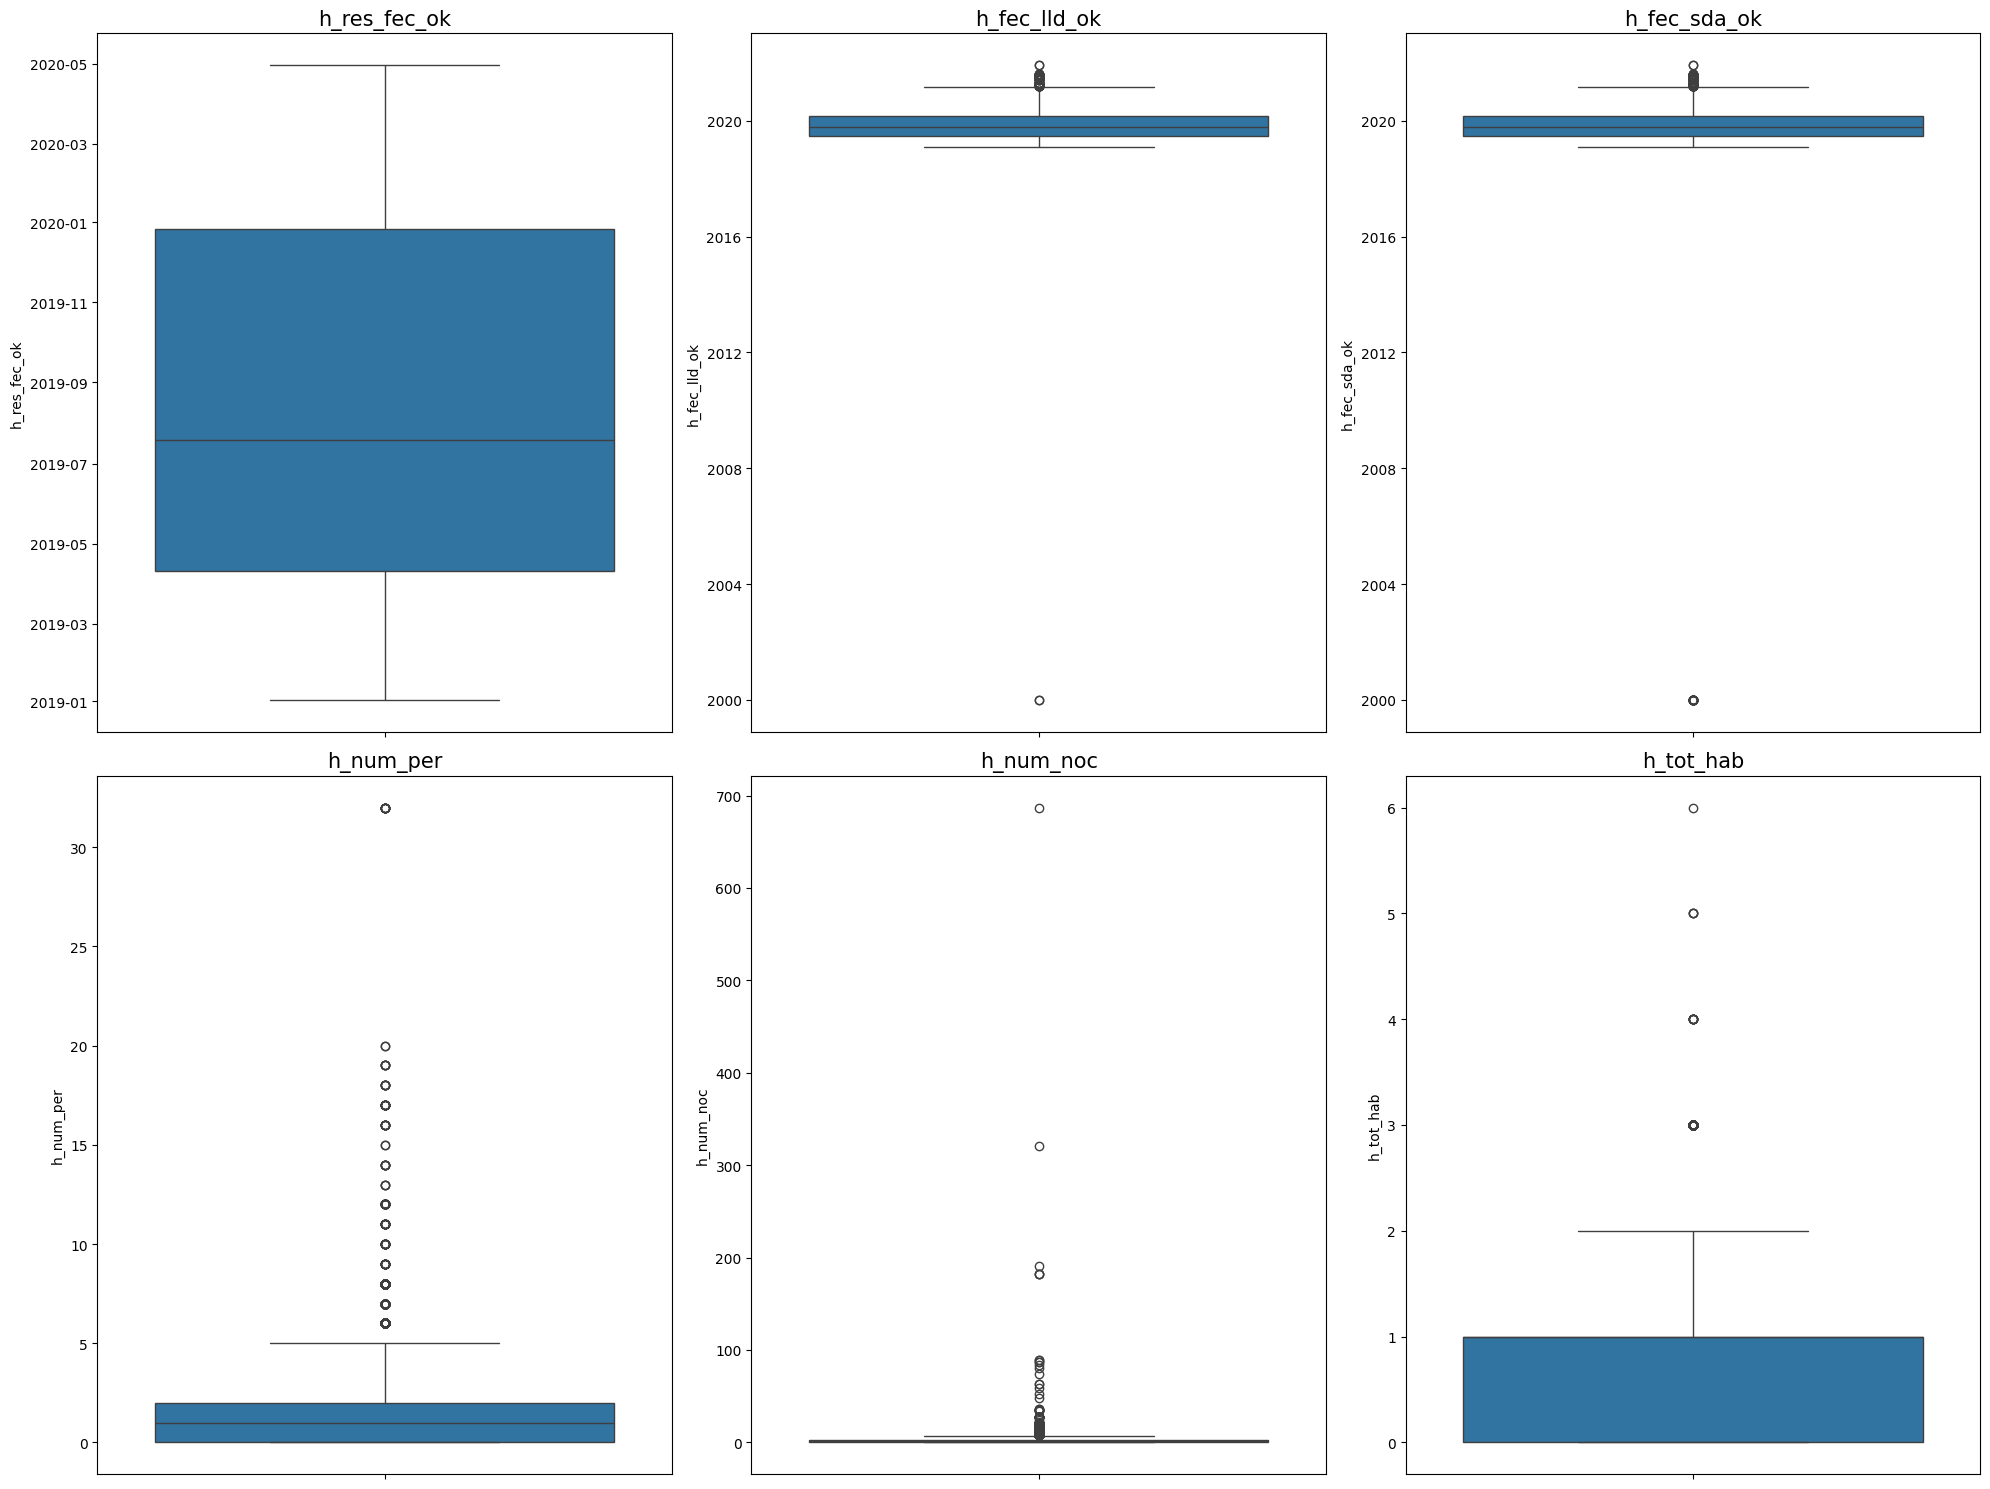

In [13]:

fig, axes = plt.subplots(2, 3, figsize=(20, 15), sharex=True)
sns.set_style("whitegrid")

for i, v in enumerate(['h_res_fec_ok', 'h_fec_lld_ok', 'h_fec_sda_ok']+metricas):
    row = i//3
    col = i%3
    g = sns.boxplot(ax=axes[row, col], y=v, data=df)
    g.tick_params()
    g.set_title(v, fontsize=15)

plt.tight_layout()
plt.show()


In [14]:
df = df[df['h_fec_lld_ok'].dt.year != 2000]
df = df[df['h_fec_sda_ok'].dt.year != 2000]


In [16]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to numeric columns (you can also limit it to your specific 'metricas' columns)
columns_to_cap = ['h_res_fec_ok', 'h_fec_lld_ok', 'h_fec_sda_ok'] + metricas
for col in columns_to_cap:
    cap_outliers(df, col)


#### 3.7 Reshaping
* Para crear una serie de tiempo de cuartos ocupados, necesitamos desglosar las reservas que abarcan varias noches. Cada reserva ocupa habitaciones durante su estadía, por lo que debemos generar una fila para cada día de esa estadía. Así, en lugar de tener una fila única por reserva, obtenemos una fila por cada día ocupado, lo que nos permite hacer un seguimiento de la ocupación diaria.

In [18]:
expanded_rows = []

for index, row in df.iterrows():
    # Creamos un rango de fecha desde el check-in hasta un día antes del check-out
    # Estos son los días de ocupación
    date_range = pd.date_range(row['h_fec_lld_ok'], row['h_fec_sda_ok'] - pd.Timedelta(days=1), freq='D')

    # Creamos df nuevo con desglose día por día de las reservas
    for date in date_range:
        expanded_rows.append({
            'ID_Reserva': row['ID_Reserva'],
            'ID_Paquete': row['ID_Paquete'],
            'ID_Segmento_Comp': row['ID_Segmento_Comp'],
            'ID_Agencia' : row['ID_Agencia'],
            'ID_Tipo_Habitacion': row['ID_Tipo_Habitacion'],
            'ID_canal': row['ID_canal'],
            'ID_estatus_reservaciones': row['ID_estatus_reservaciones'],
            'h_res_fec_ok': row['h_res_fec_ok'],
            'h_fec_lld_ok': row['h_fec_lld_ok'],
            'h_fec_sda_ok': row['h_fec_sda_ok'],
            'h_tot_hab': row['h_tot_hab'],
            'h_num_per': row['h_num_per'],
            'h_num_noc': row['h_num_noc'],
            'fecha_ocupacion': date
        })

expanded_df = pd.DataFrame(expanded_rows)
display(expanded_df)


ID_Reserva ID_Paquete ID_Segmento_Comp ID_Agencia ID_Tipo_Habitacion  \
0                0          1               14        112               Otro   
1                0          1               14        112               Otro   
2                0          1               14        112               Otro   
3                1          2               14        112               Otro   
4                1          2               14        112               Otro   
...            ...        ...              ...        ...                ...   
673249      203000          1                5       Otro               Otro   
673250      203001          2               14        112               Otro   
673251      203001          2               14        112               Otro   
673252      203001          2               14        112               Otro   
673253      203001          2               14        112               Otro   

       ID_canal ID_estatus_reservaciones h_res_fec_ok h_fec_lld_ok  \
0            10                        9   2019-08-16   2019-11-07   
1            10                        9   2019-08-16   2019-11-07   
2            10                        9   2019-08-16   2019-11-07   
3            10                        9   2019-10-22   2019-12-01   
4            10                        9   2019-10-22   2019-12-01   
...         ...                      ...          ...          ...   
673249        1                        9   2019-08-10   2019-08-10   
673250        1                        9   2019-02-24   2019-02-24   
673251        1                        9   2019-02-24   2019-02-24   
673252        1                        9   2019-02-24   2019-02-24   
673253        1                        9   2019-02-24   2019-02-24   

       h_fec_sda_ok  h_tot_hab  h_num_per  h_num_noc fecha_ocupacion  
0        2019-11-10        1.0          2        3.0      2019-11-07  
1        2019-11-10        1.0          2        3.0      2019-11-08  
2        2019-11-10        1.0          2        3.0      2019-11-09  
3        2019-12-05        1.0          4        4.0      2019-12-01  
4        2019-12-05        1.0          4        4.0      2019-12-02  
...             ...        ...        ...        ...             ...  
673249   2019-08-12        0.0          0        0.0      2019-08-11  
673250   2019-02-28        0.0          0        0.0      2019-02-24  
673251   2019-02-28        0.0          0        0.0      2019-02-25  
673252   2019-02-28        0.0          0        0.0      2019-02-26  
673253   2019-02-28        0.0          0        0.0      2019-02-27  

[673254 rows x 14 columns]

In [19]:
print('--------------------------------- DATA FRAME CHECK IN DATE RANGE: ---------------------------------')
display(f"({expanded_df['h_fec_lld_ok'].min()} , {expanded_df['h_fec_lld_ok'].max()})")

print('--------------------------------- DATA FRAME CHECK OUT DATE RANGE: ---------------------------------')
display(f"({expanded_df['h_fec_sda_ok'].min()} , {expanded_df['h_fec_sda_ok'].max()})")

print('--------------------------------- DATA FRAME FECHA DE OCUPACIÓN DATE RANGE: ---------------------------------')
display(f"({expanded_df['fecha_ocupacion'].min()} , {expanded_df['fecha_ocupacion'].max()})")

--------------------------------- DATA FRAME CHECK IN DATE RANGE: ---------------------------------


'(2019-02-05 00:00:00 , 2021-03-09 12:00:00)'

--------------------------------- DATA FRAME CHECK OUT DATE RANGE: ---------------------------------


'(2019-02-06 00:00:00 , 2021-03-13 12:00:00)'

--------------------------------- DATA FRAME FECHA DE OCUPACIÓN DATE RANGE: ---------------------------------


'(2019-02-05 00:00:00 , 2021-03-12 12:00:00)'

In [20]:
time_series = df.groupby('h_fec_lld_ok')[metricas].sum().reset_index()
date_range = pd.date_range(start=time_series['h_fec_lld_ok'].min(), end=time_series['h_fec_lld_ok'].max(), freq='D')
missing_dates = set(date_range) - set(time_series['h_fec_lld_ok'])

if missing_dates:
    print(f"Fechas faltantes de check in en el original: {len(missing_dates)}")
else:
    print("No hay fechas faltantes, la serie de tiempo es constante.")

Fechas faltantes de check in en el original: 71


#### 3.8 Groupping
* Para realizar un análisis más completo y tener los datos necesarios, crearemos 2 conjuntos de datos agrupados.
  1. Serie de tiempo simple con las métricas
  2. Serie de tiempo agrupada por tipo de habitación




In [21]:
time_series = expanded_df.groupby('fecha_ocupacion')[metricas].sum().reset_index()
time_series_by_room_type = expanded_df.groupby(['ID_Tipo_Habitacion', 'fecha_ocupacion'])[metricas].sum().reset_index()


* Creamos una nueva métrica llamada tasa_ocupacion que es: habitaciones ocupadas / total habitaciones

In [31]:
total_hab = empresas['Habitaciones_tot'].sum()
time_series['tasa_ocupacion'] = time_series['h_tot_hab'] / total_hab
time_series_by_room_type['tasa_ocupacion'] = time_series_by_room_type['h_tot_hab'] / total_hab

#### 3.9 Time Series
* Tras expandir el dataframe y crear la serie de tiempo, hay 18 fechas faltantes en la serie de tiempo. Como son pocas y no es probable que el hotel tenga 0 cuartos ocupados, los llenaremos con el valor anterior.

In [33]:
date_range = pd.date_range(start=time_series['fecha_ocupacion'].min(), end=time_series['fecha_ocupacion'].max(), freq='D')
missing_dates = set(date_range) - set(time_series['fecha_ocupacion'])

if missing_dates:
    print(f"Fechas faltantes en serie de tiempo: {len(missing_dates)}")
    print("\nLlenando fechas con procedimiento forward fill...")
    complete_time_series = pd.DataFrame({'fecha_ocupacion': date_range})
    complete_time_series = pd.merge(complete_time_series, time_series, on='fecha_ocupacion', how='left')

    # Forward fill: llenamos las fechas faltantes con el dato anterior
    complete_time_series['h_tot_hab'] = complete_time_series['h_tot_hab'].ffill()
    complete_time_series['h_num_per'] = complete_time_series['h_num_per'].ffill()
    complete_time_series['h_num_noc'] = complete_time_series['h_num_noc'].ffill()
    complete_time_series['tasa_ocupacion'] = complete_time_series['tasa_ocupacion'].ffill()

    # Verificación
    missing_dates = complete_time_series[complete_time_series['h_tot_hab'].isnull()]
    if not missing_dates.empty:
        print(f"Fechas faltantes en la serie de tiempo: {len(missing_dates)}")
    else:
        print("Ya no hay fechas faltantes, la serie de tiempo está completa.")
else:
    print("No hay fechas faltantes, la serie de tiempo es constante.")



Fechas faltantes en serie de tiempo: 18

Llenando fechas con procedimiento forward fill...
Ya no hay fechas faltantes, la serie de tiempo está completa.


In [34]:
# Quitamos datos extraños con solo 1 habitación ocupada
complete_time_series = complete_time_series[(complete_time_series['fecha_ocupacion'] >= "2019-02-13") & (complete_time_series['fecha_ocupacion'] <= "2021-01-10")]


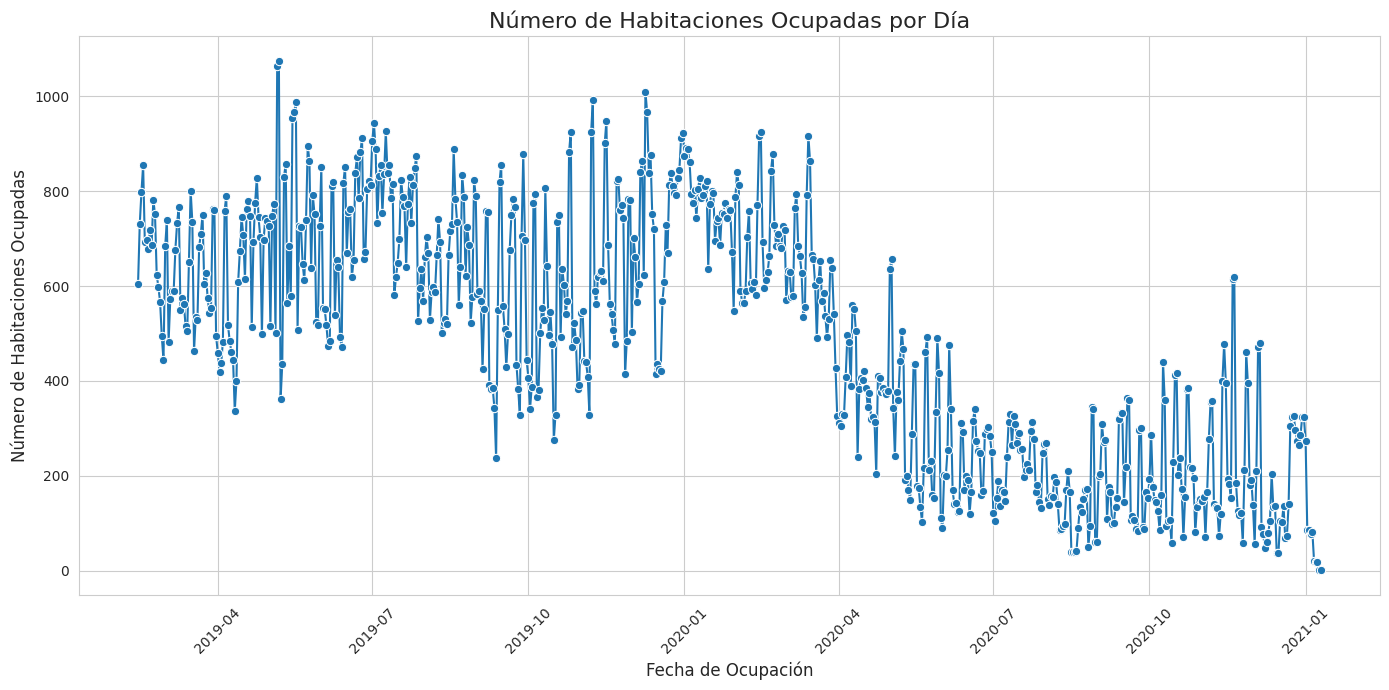

In [35]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=complete_time_series, x='fecha_ocupacion', y='h_tot_hab', marker='o')

plt.title('Número de Habitaciones Ocupadas por Día', fontsize=16)
plt.xlabel('Fecha de Ocupación', fontsize=12)
plt.ylabel('Número de Habitaciones Ocupadas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




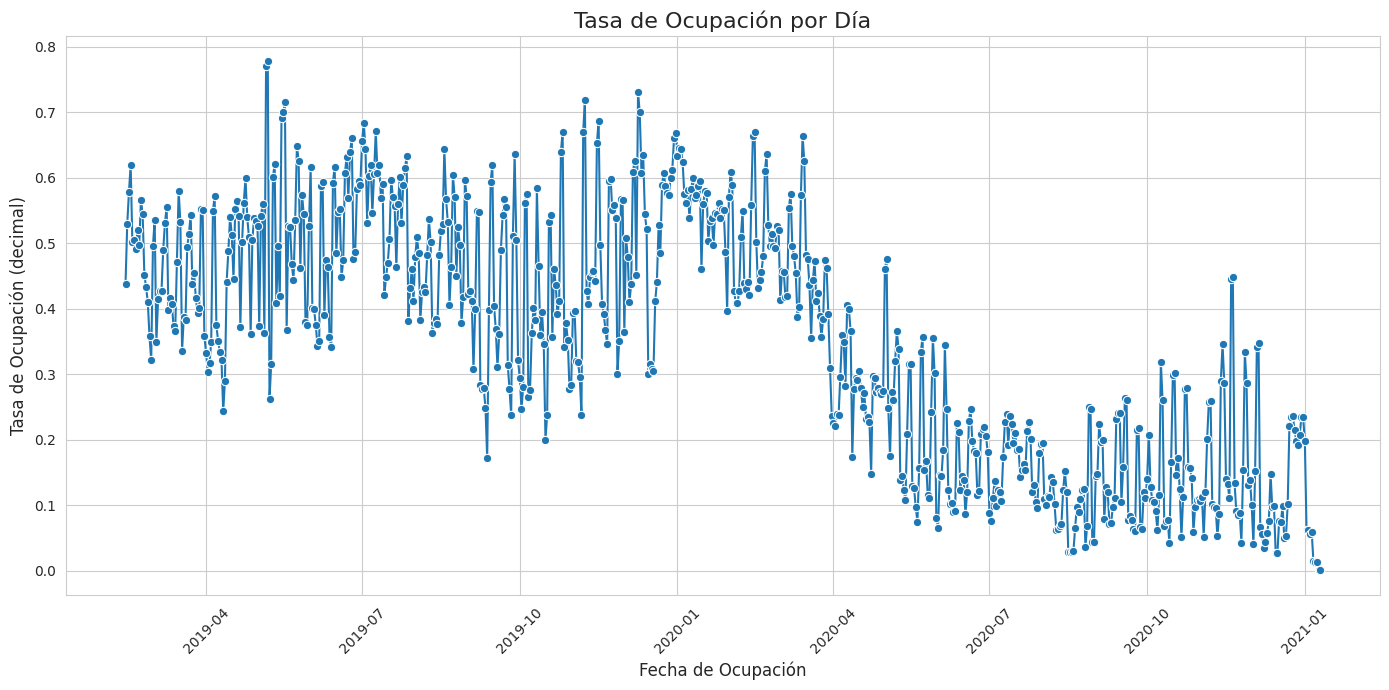

In [37]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=complete_time_series, x='fecha_ocupacion', y='tasa_ocupacion', marker='o')

plt.title('Tasa de Ocupación por Día', fontsize=16)
plt.xlabel('Fecha de Ocupación', fontsize=12)
plt.ylabel('Tasa de Ocupación (decimal)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




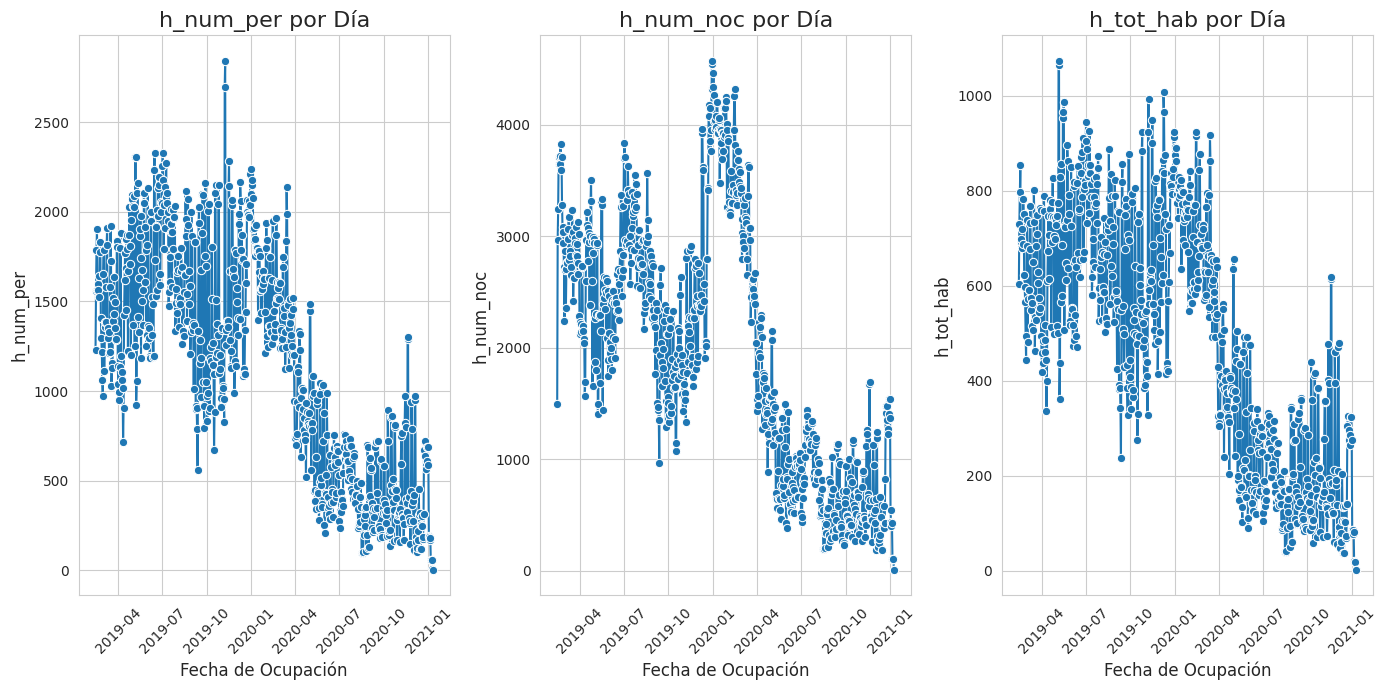

In [ ]:
num_metrics = len(metricas)
num_rows = np.ceil(num_metrics / 3).astype(int)  # 3 columnas por fila

fig, axes = plt.subplots(num_rows, 3, figsize=(14, 7 * num_rows))
axes = axes.flatten()

# Gráfica de serie de tiempo de cada día
for i, metrica in enumerate(metricas):
    sns.lineplot(data=complete_time_series, x='fecha_ocupacion', y=metrica, marker='o', ax=axes[i])

    axes[i].set_title(f'{metrica} por Día', fontsize=16)
    axes[i].set_xlabel('Fecha de Ocupación', fontsize=12)
    axes[i].set_ylabel(metrica, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

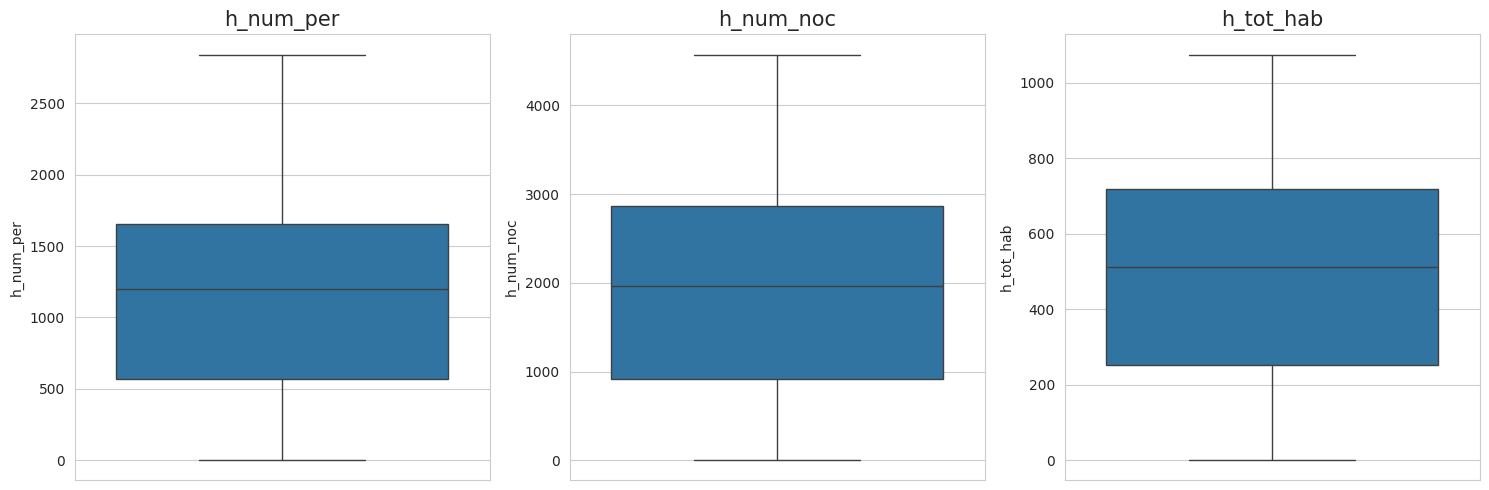

In [ ]:
fig, axes = plt.subplots(1, len(metricas), figsize=(len(metricas) * 5, 5))

for i, v in enumerate(metricas):
    g = sns.boxplot(ax=axes[i], y=v, data=complete_time_series)
    g.tick_params()
    g.set_title(v, fontsize=15)

plt.tight_layout()
plt.show()


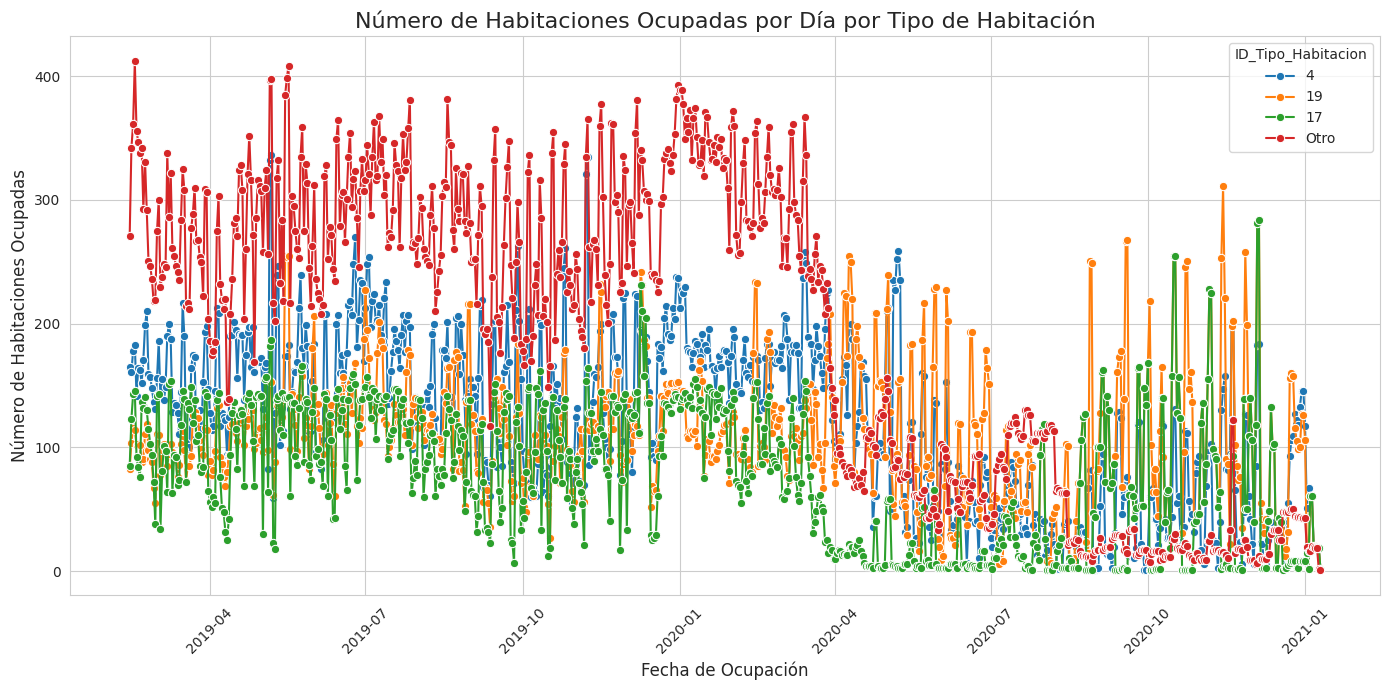

In [ ]:
# Crear el rango de fechas completo y realizar un merge para cubrir todas las fechas
complete_time_series_by_room_type = pd.DataFrame({'fecha_ocupacion': date_range})
complete_time_series_by_room_type = pd.merge(complete_time_series_by_room_type,
                                             pd.DataFrame({'ID_Tipo_Habitacion': ['4', '19', '17', 'Otro']}),
                                             how='cross')
# Merge con el time_series_by_room_type
complete_time_series_by_room_type = pd.merge(complete_time_series_by_room_type,
                                             time_series_by_room_type,
                                             on=['ID_Tipo_Habitacion', 'fecha_ocupacion'],
                                             how='left')

# Rellenar valores faltantes
complete_time_series_by_room_type['h_tot_hab'] = complete_time_series_by_room_type['h_tot_hab'].ffill()
complete_time_series_by_room_type['h_num_per'] = complete_time_series_by_room_type['h_num_per'].ffill()
complete_time_series_by_room_type['h_num_noc'] = complete_time_series_by_room_type['h_num_noc'].ffill()

# Quitamos valores extraños de 1
complete_time_series_by_room_type = complete_time_series_by_room_type[(complete_time_series_by_room_type['fecha_ocupacion'] >= "2019-02-13") & (complete_time_series_by_room_type['fecha_ocupacion'] <= "2021-01-10")]


# Graficar por tipo de habitación
plt.figure(figsize=(14, 7))
sns.lineplot(data=complete_time_series_by_room_type, x='fecha_ocupacion', y='h_tot_hab',
             hue='ID_Tipo_Habitacion', marker='o')

plt.title('Número de Habitaciones Ocupadas por Día por Tipo de Habitación', fontsize=16)
plt.xlabel('Fecha de Ocupación', fontsize=12)
plt.ylabel('Número de Habitaciones Ocupadas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 3.10 Distribución

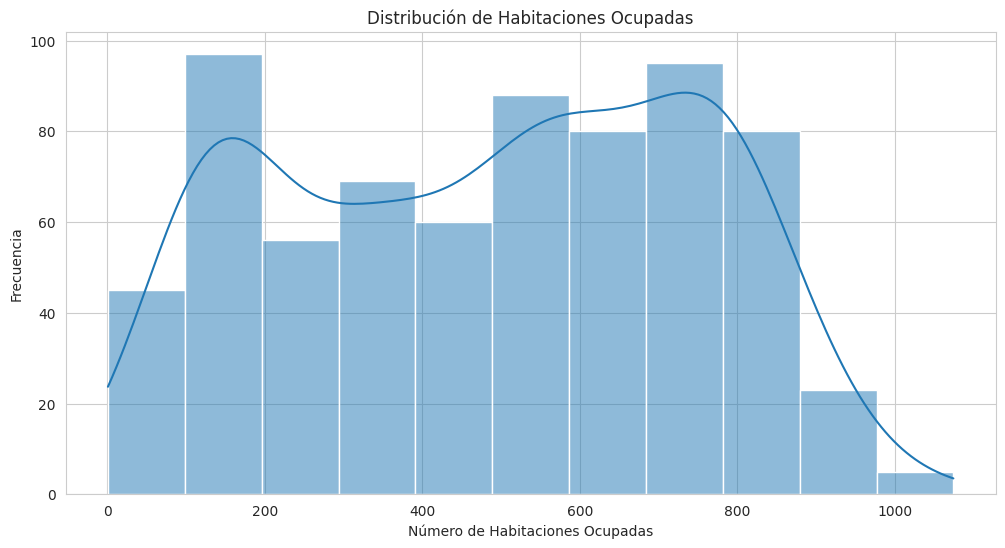

Shapiro-Wilk Test: Statistic=0.9562159877429263, p-value=1.4680990465421406e-13
Los datos no siguen una distribución normal.


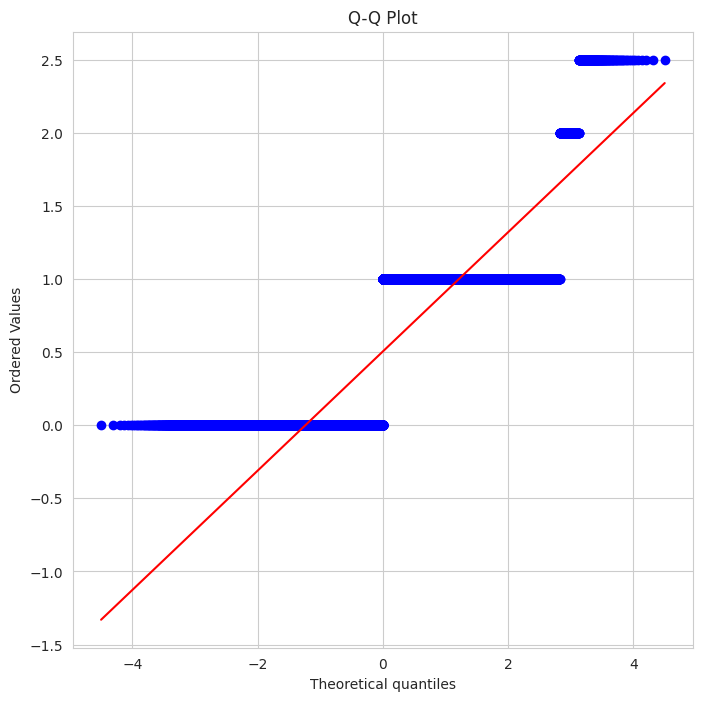

In [ ]:
# Histograma y KDE (Kernel Density Estimation) para ver la distribución
plt.figure(figsize=(12, 6))
sns.histplot(complete_time_series['h_tot_hab'], kde=True)
plt.title('Distribución de Habitaciones Ocupadas')
plt.xlabel('Número de Habitaciones Ocupadas')
plt.ylabel('Frecuencia')
plt.show()

# Prueba de normalidad (Shapiro-Wilk test)
stat, p_value = stats.shapiro(complete_time_series['h_tot_hab'].dropna())
print(f"Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}")

# Si p-value > 0.05, no hay suficiente evidencia para rechazar la normalidad
if p_value > 0.05:
    print("Los datos siguen una distribución normal.")
else:
    print("Los datos no siguen una distribución normal.")

# Q-Q plot
plt.figure(figsize=(8, 8))
stats.probplot(df['h_tot_hab'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

#### 3.11 Correlación

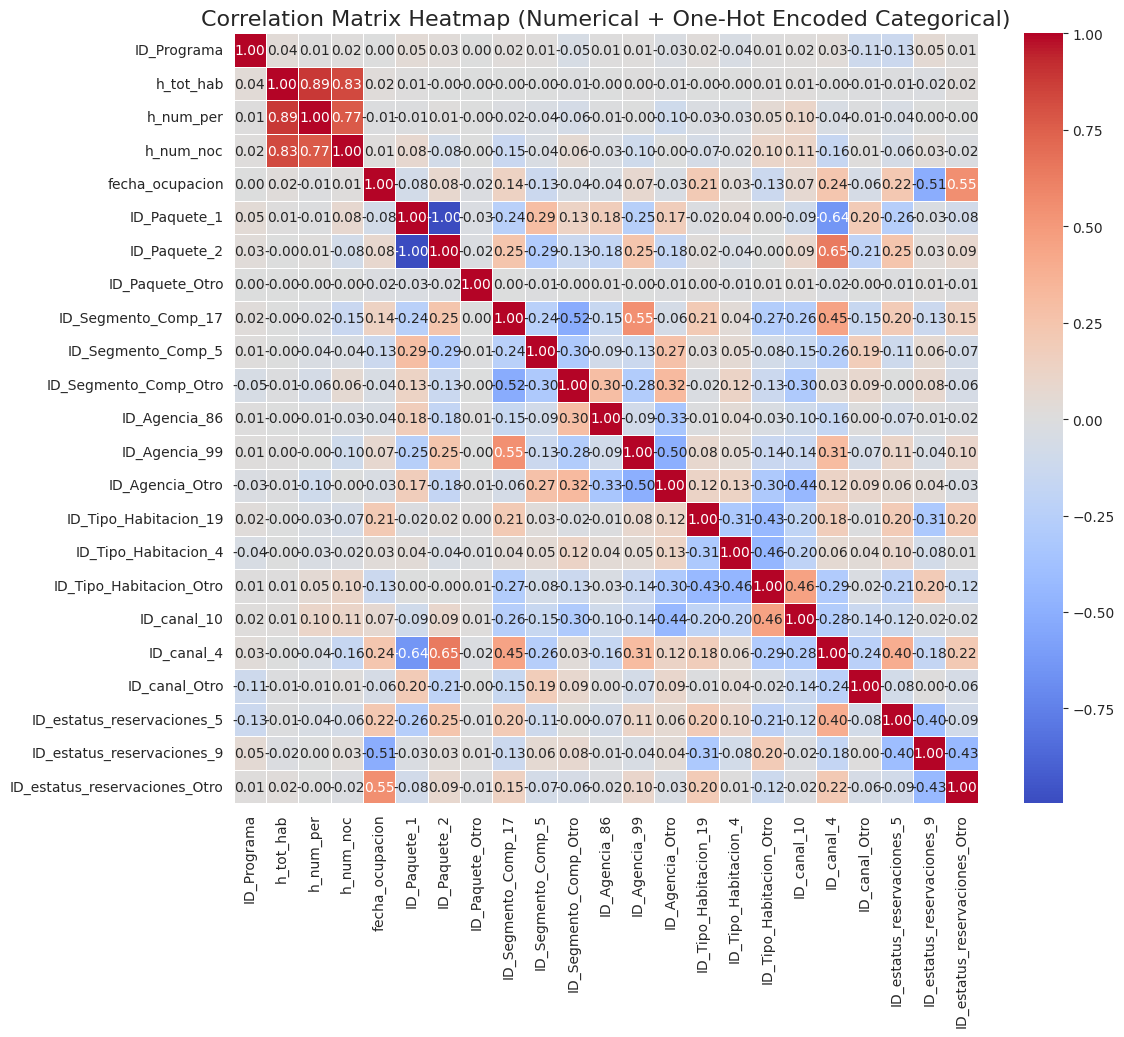

In [ ]:
categorical_columns = ['ID_Paquete', 'ID_Segmento_Comp', 'ID_Agencia',
                       'ID_Tipo_Habitacion', 'ID_canal', 'ID_estatus_reservaciones']

# One-hot encoding for categorical columns (drop first to avoid multicollinearity)
expanded_df_encoded = pd.get_dummies(expanded_df, columns=categorical_columns, drop_first=True)
# Remove certain columns
columns_to_remove = ['ID_Reserva', 'h_res_fec_ok', 'h_fec_lld_ok', 'h_fec_sda_ok']
expanded_df_encoded = expanded_df_encoded.drop(columns=columns_to_remove)

corr_matrix = expanded_df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical + One-Hot Encoded Categorical)", fontsize=16)
plt.show()

#### 3.12 Exportar Datos

In [ ]:
# Exportar a excel
expanded_df.to_excel('ia_reservaciones_expandida_limpia.xlsx', index=False)
complete_time_series.to_excel('reservaciones_time_series.xlsx', index=False)
complete_time_series_by_room_type.to_excel('reservaciones_time_series_by_room_type.xlsx', index=False)

In [ ]:
profile_report = ProfileReport(expanded_df, title=f"Final Profiling Report {reservaciones_name}")
profile_report.to_file(f"Final_Profile_report_{reservaciones_name}.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:27<00:00,  1.81s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

------------------------------------------
### Tabla **Ocupaciones**

------------------------------------------

*Dimensiones*
- Fecha_hoy
- ID_Entidad_Fed
- ID_Agencia
- ID_Tipo_Habitacion
- ID_canal
- ID_Paquete
- ID_empresa
- ID_edificio
- ID_Segmento_Mercado
- ID_Segmento_Alterno
- ID_Segmento_Comp
- moneda_cve
- ID_Empresa2

*Métricas*
- ing_hab: ingreso por habitación
- cto_noc: habitaciones rentadas
- ADR
- num_men
- num_adu
- TREVPEC


In [16]:
dimensiones = ['Fecha_hoy', 'ID_Entidad_Fed', 'ID_Agencia', 'ID_Tipo_Habitacion', 'ID_canal','ID_Paquete',
               'ID_edificio', 'ID_Segmento_Mercado', 'ID_Segmento_Alterno', 'ID_Segmento_Comp',
               'moneda_cve', 'ID_empresa', 'ID_Empresa2']
metricas = ['ing_hab', 'cto_noc', 'ADR', 'num_men', 'num_adu', 'TREVPEC']

df = ocupaciones_gigante[dimensiones+metricas].copy()

In [17]:
print('--------------------------------- DATA FRAME SHAPE: ---------------------------------')
print(df.shape)
print('--------------------------------- DATA FRAME SCHEMA: ---------------------------------')
print(df.dtypes)
print('--------------------------------- DATA FRAME HEAD: ---------------------------------')
display(df.head(5))
print('--------------------------------- DATA FRAME SUMMARY: ---------------------------------')
display(df.describe())



--------------------------------- DATA FRAME SHAPE: ---------------------------------
(2117283, 19)
--------------------------------- DATA FRAME SCHEMA: ---------------------------------
Fecha_hoy               object
ID_Entidad_Fed           int64
ID_Agencia               int64
ID_Tipo_Habitacion       int64
ID_canal                 int64
ID_Paquete               int64
ID_edificio            float64
ID_Segmento_Mercado    float64
ID_Segmento_Alterno    float64
ID_Segmento_Comp       float64
moneda_cve             float64
ID_empresa             float64
ID_Empresa2            float64
ing_hab                float64
cto_noc                float64
ADR                    float64
num_men                float64
num_adu                float64
TREVPEC                float64
dtype: object
--------------------------------- DATA FRAME HEAD: ---------------------------------


Fecha_hoy  ID_Entidad_Fed  ID_Agencia  ID_Tipo_Habitacion  \
0  2021-11-15 00:00:00.000             173         305                  13   
1  2021-11-15 00:00:00.000             173         305                  14   
2  2021-11-15 00:00:00.000             173         305                  14   
3  2021-11-15 00:00:00.000             173         305                  14   
4  2021-11-15 00:00:00.000             173         305                  19   

   ID_canal  ID_Paquete  ID_edificio  ID_Segmento_Mercado  \
0         1           1          3.0                  6.0   
1         0           1          3.0                  6.0   
2         1           1          3.0                  6.0   
3         1           1          3.0                  6.0   
4         3           1          3.0                  6.0   

   ID_Segmento_Alterno  ID_Segmento_Comp  moneda_cve  ID_empresa  ID_Empresa2  \
0                 17.0              34.0         2.0         1.0          7.0   
1                 17.0              34.0         2.0         1.0          7.0   
2                 17.0              34.0         1.0         1.0          7.0   
3                 17.0              34.0         2.0         1.0          7.0   
4                 17.0              34.0         2.0         1.0          7.0   

   ing_hab  cto_noc  ADR  num_men  num_adu  TREVPEC  
0      0.0      0.0  0.0      0.0      0.0      0.0  
1      0.0      0.0  0.0      0.0      0.0      0.0  
2      0.0      0.0  0.0      0.0      0.0      0.0  
3      0.0      0.0  0.0      0.0      0.0      0.0  
4      0.0      0.0  0.0      0.0      0.0      0.0

--------------------------------- DATA FRAME SUMMARY: ---------------------------------


ID_Entidad_Fed    ID_Agencia  ID_Tipo_Habitacion      ID_canal  \
count    2.117283e+06  2.117283e+06        2.117283e+06  2.117283e+06   
mean     1.733904e+02  3.532398e+02        2.865676e+01  7.973302e+00   
std      1.044442e+02  2.993998e+02        1.532295e+01  1.261396e+01   
min      0.000000e+00  0.000000e+00        1.000000e+00  0.000000e+00   
25%      6.300000e+01  1.230000e+02        1.700000e+01  1.000000e+00   
50%      1.730000e+02  2.140000e+02        3.000000e+01  2.000000e+00   
75%      2.610000e+02  7.710000e+02        3.600000e+01  4.000000e+00   
max      3.770000e+02  1.052000e+03        6.600000e+01  5.500000e+01   

         ID_Paquete   ID_edificio  ID_Segmento_Mercado  ID_Segmento_Alterno  \
count  2.117283e+06  2.117282e+06         2.117282e+06         2.117282e+06   
mean   1.001488e+00  1.475951e+00         4.515644e+00         2.215407e+01   
std    3.918078e-02  1.311751e+00         1.876088e+00         1.142680e+01   
min    1.000000e+00  0.000000e+00         1.000000e+00         0.000000e+00   
25%    1.000000e+00  0.000000e+00         3.000000e+00         1.700000e+01   
50%    1.000000e+00  2.000000e+00         6.000000e+00         1.700000e+01   
75%    1.000000e+00  3.000000e+00         6.000000e+00         2.500000e+01   
max    3.000000e+00  4.000000e+00         7.000000e+00         4.900000e+01   

       ID_Segmento_Comp  moneda_cve    ID_empresa   ID_Empresa2       ing_hab  \
count      2.117282e+06   2117282.0  2.117282e+06  2.117282e+06  2.117283e+06   
mean       2.424700e+01         1.5  2.171501e+00  3.618428e+00  1.310373e+03   
std        1.214934e+01         0.5  1.512810e+00  2.342307e+00  5.566302e+03   
min        0.000000e+00         1.0  1.000000e+00  1.000000e+00 -1.432951e+05   
25%        1.200000e+01         1.0  1.000000e+00  2.000000e+00  0.000000e+00   
50%        3.200000e+01         1.0  2.000000e+00  2.000000e+00  0.000000e+00   
75%        3.400000e+01         2.0  2.000000e+00  6.000000e+00  8.680760e+02   
max        4.900000e+01         2.0  6.000000e+00  7.000000e+00  9.926749e+05   

            cto_noc           ADR       num_men       num_adu       TREVPEC  
count  2.117282e+06  2.117282e+06  2.117282e+06  2.117282e+06  2.117282e+06  
mean   9.555893e-01  7.545803e+02  5.122001e-01  1.948773e+00  7.384901e+02  
std    2.348385e+00  1.587115e+03  1.845489e+00  4.892331e+00  1.061545e+03  
min   -1.000000e+00 -7.043207e+04 -1.000000e+00 -6.000000e+00 -2.307219e+04  
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%    1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  
75%    1.000000e+00  4.443528e+02  0.000000e+00  2.000000e+00  1.209515e+03  
max    2.050000e+02  1.056047e+05  1.120000e+02  4.100000e+02  1.037335e+05

#### 3.1 Data types
* NOTA: La única diferencia entre ID_empresa y ID_Empresa2 es que el ID_Empresa2 divide la empresa 1 en 1 y 7.
* Hay muchos ID_Agencia y ninguno representa un gran %

In [18]:
for c in dimensiones:
  if c not in ('Fecha_hoy'):
    value_counts = df[c].value_counts()
    percentages = df[c].value_counts(normalize=True) * 100

    value_percent_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages
    })
    display(value_percent_df)

Count  Percentage
ID_Entidad_Fed                    
173             497096   23.478014
294             161071    7.607438
48              154263    7.285894
5               111967    5.288240
253              84446    3.988413
...                ...         ...
322                 10    0.000472
184                  8    0.000378
150                  8    0.000378
0                    8    0.000378
377                  6    0.000283

[251 rows x 2 columns]

Count  Percentage
ID_Agencia                    
125         119957    5.665610
158         103890    4.906760
821         103002    4.864820
99           82006    3.873171
50           78231    3.694877
...            ...         ...
867              4    0.000189
483              4    0.000189
109              4    0.000189
795              4    0.000189
831              2    0.000094

[486 rows x 2 columns]

Count  Percentage
ID_Tipo_Habitacion                    
30                  313257   14.795235
6                   194416    9.182334
36                  141201    6.668972
17                  100210    4.732953
28                   96451    4.555414
...                    ...         ...
56                     758    0.035801
49                     711    0.033581
66                     604    0.028527
43                     576    0.027205
38                     494    0.023332

[66 rows x 2 columns]

Count  Percentage
ID_canal                    
1         754938   35.655980
2         728896   34.426007
25        198275    9.364596
26         71151    3.360486
3          70157    3.313539
47         55525    2.622465
4          44909    2.121067
34         23273    1.099192
20         21393    1.010399
0          18397    0.868897
32         17247    0.814582
6          14648    0.691830
46         14060    0.664059
23         12275    0.579752
7          11085    0.523548
38         10477    0.494832
50          9488    0.448121
5           9162    0.432724
35          8198    0.387194
45          7157    0.338028
10          2647    0.125019
49          1982    0.093611
51          1874    0.088510
21          1512    0.071412
48           972    0.045908
16           911    0.043027
12           814    0.038445
29           754    0.035612
17           682    0.032211
44           680    0.032117
14           560    0.026449
15           394    0.018609
43           370    0.017475
22           338    0.015964
40           306    0.014452
11           296    0.013980
9            272    0.012847
8            230    0.010863
24           214    0.010107
18           168    0.007935
37           152    0.007179
27            84    0.003967
19            82    0.003873
33            70    0.003306
31            64    0.003023
39            48    0.002267
36            24    0.001134
41            20    0.000945
42            20    0.000945
13            18    0.000850
55            14    0.000661

Count  Percentage
ID_Paquete                     
1           2114184   99.853633
2              3047    0.143911
3                52    0.002456

Count  Percentage
ID_edificio                    
0.0          869295   41.057119
2.0          678176   32.030499
3.0          510592   24.115446
4.0           59219    2.796935

Count  Percentage
ID_Segmento_Mercado                    
6.0                  878165   41.476053
3.0                  623023   29.425603
7.0                  231538   10.935624
2.0                  218999   10.343403
1.0                  101484    4.793126
4.0                   57781    2.729018
5.0                    6292    0.297173

Count  Percentage
ID_Segmento_Alterno                    
17.0                 691173   32.644353
21.0                 214718   10.141209
23.0                 197200    9.313828
45.0                 195477    9.232450
15.0                 166821    7.879017
25.0                  95400    4.505777
31.0                  76254    3.601504
34.0                  60367    2.851155
7.0                   51682    2.440960
2.0                   42618    2.012864
48.0                  40187    1.898047
1.0                   35037    1.654810
3.0                   31766    1.500320
6.0                   31725    1.498383
32.0                  23048    1.088565
10.0                  22435    1.059613
27.0                  18803    0.888073
49.0                  17594    0.830971
18.0                  13844    0.653857
46.0                  11805    0.557554
47.0                  11717    0.553398
22.0                  10009    0.472729
36.0                   7781    0.367499
35.0                   7002    0.330707
11.0                   6725    0.317624
16.0                   6327    0.298827
12.0                   6072    0.286783
19.0                   4313    0.203705
39.0                   3868    0.182687
24.0                   2455    0.115951
33.0                   2312    0.109197
26.0                   2097    0.099042
13.0                   1751    0.082700
30.0                   1466    0.069240
38.0                   1255    0.059274
8.0                    1118    0.052804
43.0                   1052    0.049686
37.0                    968    0.045719
14.0                    325    0.015350
29.0                    242    0.011430
9.0                     128    0.006045
5.0                     120    0.005668
44.0                     65    0.003070
4.0                      36    0.001700
20.0                     36    0.001700
40.0                     36    0.001700
28.0                     30    0.001417
41.0                     16    0.000756
0.0                       6    0.000283

Count  Percentage
ID_Segmento_Comp                    
34.0              691173   32.644353
12.0              214718   10.141209
14.0              197200    9.313828
7.0               195477    9.232450
32.0              166821    7.879017
16.0               95400    4.505777
22.0               76254    3.601504
3.0                60367    2.851155
42.0               51682    2.440960
37.0               42618    2.012864
23.0               40187    1.898047
36.0               35037    1.654810
38.0               31766    1.500320
41.0               31725    1.498383
1.0                23048    1.088565
45.0               22435    1.059613
18.0               18803    0.888073
24.0               17594    0.830971
35.0               13844    0.653857
8.0                11805    0.557554
9.0                11717    0.553398
13.0               10009    0.472729
5.0                 7781    0.367499
4.0                 7002    0.330707
46.0                6725    0.317624
33.0                6327    0.298827
47.0                6072    0.286783
10.0                4313    0.203705
26.0                3868    0.182687
15.0                2455    0.115951
2.0                 2312    0.109197
17.0                2097    0.099042
48.0                1751    0.082700
21.0                1466    0.069240
25.0                1255    0.059274
43.0                1118    0.052804
30.0                1052    0.049686
6.0                  968    0.045719
49.0                 325    0.015350
20.0                 242    0.011430
44.0                 128    0.006045
40.0                 120    0.005668
31.0                  65    0.003070
39.0                  36    0.001700
11.0                  36    0.001700
27.0                  36    0.001700
19.0                  30    0.001417
28.0                  16    0.000756
0.0                    6    0.000283

Count  Percentage
moneda_cve                     
1.0         1058642   50.000047
2.0         1058640   49.999953

Count  Percentage
ID_empresa                    
2.0         898522   42.437521
1.0         811933   38.347891
6.0         217166   10.256829
3.0         113658    5.368109
5.0          40722    1.923315
4.0          35281    1.666334

Count  Percentage
ID_Empresa2                    
2.0          898522   42.437521
7.0          510592   24.115446
1.0          301341   14.232445
6.0          217166   10.256829
3.0          113658    5.368109
5.0           40722    1.923315
4.0           35281    1.666334

#### 3.2 Categorical Columns
* Para facilitar el proceso de análisis y predicción, limitaremos todas las categorías a máximo 4 (los top 3 y 'otro')
* Transformamos las dimensiones categóricas a datos categóricos
* Como ID_Agencia y ID_paquete están muy desbalanceados y predomina un 95% una sola categoría, se eliminarán

In [19]:
columnas_categoricas = ['ID_Entidad_Fed', 'ID_Agencia', 'ID_Tipo_Habitacion', 'ID_canal',
                        'ID_edificio', 'ID_Segmento_Mercado', 'ID_Segmento_Alterno', 'ID_Segmento_Comp',
                        'moneda_cve']
for col in columnas_categoricas:
    df = categorizar_top_3_categories(df, col, top=5)
    df[col] = df[col].astype('category')


df.drop(columns=['ID_Agencia','ID_Paquete'], inplace=True)

#### 3.3 Date Columns
* Tranformamos la fecha de hoy a date object
* De 2023-06-05 a 2024-12-15, ¡casi no hay datos!

In [20]:
df['Fecha_hoy'] = pd.to_datetime(df['Fecha_hoy'])
print('--------------------------------- DATA FRAME CHECK IN DATE RANGE: ---------------------------------')
display(f"({df['Fecha_hoy'].min()} , {df['Fecha_hoy'].max()})")

date_range = pd.date_range(start=df['Fecha_hoy'].min(), end=df['Fecha_hoy'].max(), freq='D')
missing_dates = set(date_range) - set(df['Fecha_hoy'])
print("Fechas faltantes:",len(missing_dates))




# Rango de fechas por hotel
date_range_df = df.groupby('ID_empresa')['Fecha_hoy'].agg(['min', 'max']).reset_index()
print('--------------------------------- DATE RANGE FOR EACH ID_empresa ---------------------------------')
display(date_range_df)

--------------------------------- DATA FRAME CHECK IN DATE RANGE: ---------------------------------


'(2020-11-01 00:00:00 , 2024-12-16 00:00:00)'

Fechas faltantes: 521
--------------------------------- DATE RANGE FOR EACH ID_empresa ---------------------------------


ID_empresa        min        max
0         1.0 2020-11-01 2024-12-16
1         2.0 2020-12-01 2024-12-16
2         3.0 2020-11-01 2024-12-16
3         4.0 2021-03-01 2024-11-19
4         5.0 2021-02-01 2024-11-19
5         6.0 2021-02-28 2024-11-20

#### 3.4 Nulls
* Solo hay una fila con valores nulos. Se eliminará.
* Así como en la tabla de reservaciones, el 50 % de las habitaciones no fueron ocupadas.

In [21]:
df_aux = pd.DataFrame()
df_aux['# nulls'] = df.isna().sum()
df_aux['% nulls'] = df.isna().sum() / df.shape[0]
df_aux.style.format({
    '# nulls': '{:,}'.format,
    '% nulls': '{:,.0%}'.format
})


In [22]:
df.dropna(inplace=True)

In [23]:
df_aux = pd.DataFrame()
df_aux['# 0 values'] = (df == 0).sum()
df_aux['% 0 values'] = (df == 0).sum() / df.shape[0]

df_aux.style.format({
    '# 0 values': '{:,}'.format,
    '% 0 values': '{:,.0%}'.format
})

In [24]:
df_aux = pd.DataFrame()
df_aux['# 0 values'] = (df[metricas] < 0).sum()
df_aux['% 0 values'] = (df[metricas] < 0).sum() / df.shape[0]

df_aux.style.format({
    '# 0 values': '{:,}'.format,
    '% 0 values': '{:,.0%}'.format
})

No tiene sentido que estos datos tengan valores negativos, por lo que estos registros no se tomaran en cuenta

In [25]:
# Keep rows where A and B are non-negative
df = df[(df['ing_hab'] >= 0) & (df['cto_noc'] >= 0) & (df['ADR'] >= 0) & (df['TREVPEC'] >= 0)]

In [26]:
df_aux = pd.DataFrame()
df_aux['# 0 values'] = (df[metricas] < 0).sum()
df_aux['% 0 values'] = (df[metricas] < 0).sum() / df.shape[0]

df_aux.style.format({
    '# 0 values': '{:,}'.format,
    '% 0 values': '{:,.0%}'.format
})

#### 3.5 Duplicate Values

* Las filas duplicadas, posiblemente se deban a todos los registros donde no se vendieron cuartos

In [27]:
print('----------> Hay {} filas duplicadas en el dataset'.format(df.duplicated().sum()))


----------> Hay 707810 filas duplicadas en el dataset


#### 3.6 Atypical Values


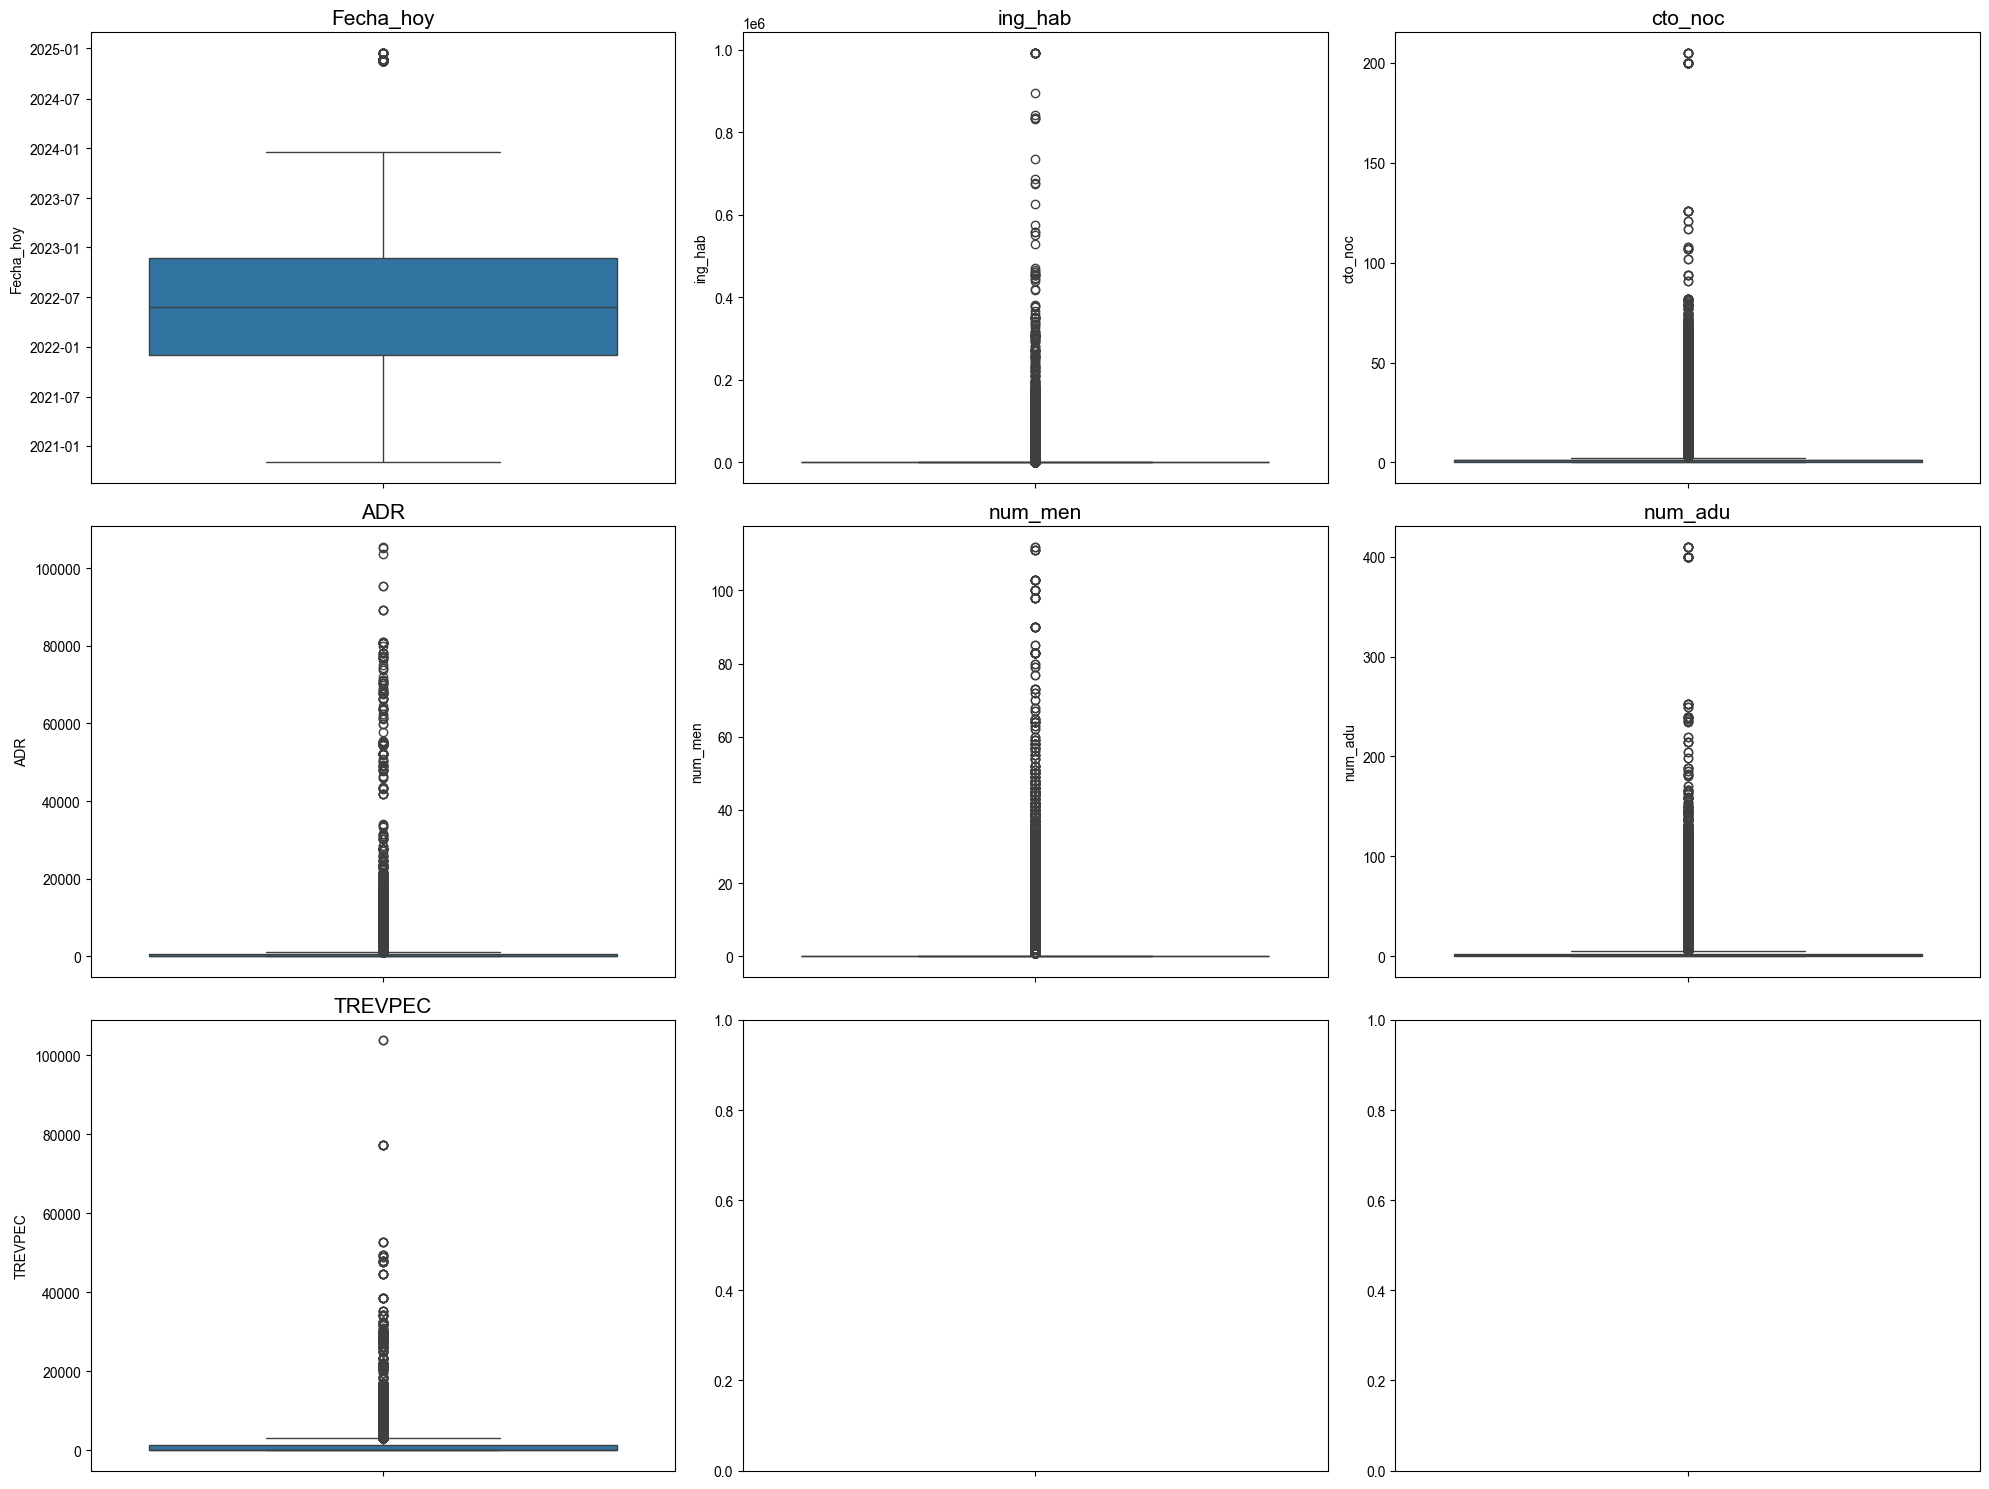

In [28]:

fig, axes = plt.subplots(3, 3, figsize=(20, 15), sharex=True)
sns.set_style("whitegrid")

for i, v in enumerate(['Fecha_hoy']+metricas):
    row = i//3
    col = i%3
    g = sns.boxplot(ax=axes[row, col], y=v, data=df)
    g.tick_params()
    g.set_title(v, fontsize=15)

plt.tight_layout()
plt.show()


Parece ser que hay datos atípicos muy alejados de los datos, habrá que ver si se deben eliminar

- No se usará la regla de 3 desviaciones estándar dado que la distribución de los datos está muy alejada de la normalidad

#### 3.7 Reshaping
* No reshaping needed

####  3.7.1 ing_hab en pesos

---

- Cambiar todas las métricas de ingresos: ['ing_hab', 'ADR', 'TREVPEC'] a pesos MXN ('moneda_cve'==1) , haciendo la conversión: 1 USD ('moneda_cve'=2) = 20 MXN

In [27]:
# Apply to all the rows that have 'moneda_cve' as '1, so the columns 'ing_hab' *20, 'ADR' *20, TREVPEC' *20
mask = df['moneda_cve'] == '2.0'
cols_to_multiply = ['ing_hab', 'ADR', 'TREVPEC']
df.loc[mask, cols_to_multiply] = df.loc[mask, cols_to_multiply] * 20


In [31]:
df.groupby('moneda_cve')['ing_hab'].sum()

C:\Users\angel\AppData\Local\Temp\ipykernel_9488\3134668929.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('moneda_cve')['ing_hab'].sum()


moneda_cve
1.0     2.646479e+09
2.0     2.611623e+09
Otro    0.000000e+00
Name: ing_hab, dtype: float64

Dado que la distribución de ambas monedas era casi 50% de cada una, entonces al hacer la conversión se encontró que la cantidad total es muy parecida

#### 3.8 Groupping
* Para realizar un análisis más completo y tener los datos necesarios, crearemos 2 conjuntos de datos agrupados.
  1. Serie de tiempo simple con todas las métricas
  2. Serie de tiempo agrupada por empresa



In [32]:
ocupaciones_time_series = df.groupby(['Fecha_hoy'])[metricas].sum().reset_index()
num_cuartos=ocupaciones_time_series['cto_noc'].max()
ocupaciones_time_series['tasa_ocupacion'] = ocupaciones_time_series['cto_noc'] / num_cuartos
ocupaciones_time_series.head(5)


Fecha_hoy       ing_hab  cto_noc            ADR  num_men  num_adu  \
0 2020-11-01  1.715301e+06    868.0  882743.045344    396.0   1734.0   
1 2020-11-02  1.605618e+06    802.0  786858.344483    460.0   1616.0   
2 2020-11-03  1.516994e+06    760.0  712142.781526    400.0   1536.0   
3 2020-11-04  1.179054e+06    574.0  662056.363734    200.0   1114.0   
4 2020-11-05  1.706119e+06    816.0  887530.745699    256.0   1646.0   

        TREVPEC  tasa_ocupacion  
0  4.954178e+06        0.241918  
1  4.468895e+06        0.223523  
2  3.956707e+06        0.211817  
3  3.705596e+06        0.159978  
4  4.758461e+06        0.227425

In [33]:

ocupaciones_time_series_by_entidad = df.groupby(['ID_Entidad_Fed', 'Fecha_hoy'])[metricas].sum().reset_index()
ocupaciones_time_series_by_entidad['tasa_ocupacion'] = ocupaciones_time_series_by_entidad['cto_noc'] / num_cuartos
ocupaciones_time_series_by_entidad.head(5)


C:\Users\angel\AppData\Local\Temp\ipykernel_9488\2546933883.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ocupaciones_time_series_by_entidad = df.groupby(['ID_Entidad_Fed', 'Fecha_hoy'])[metricas].sum().reset_index()


ID_Entidad_Fed  Fecha_hoy       ing_hab  cto_noc            ADR  num_men  \
0            173 2020-11-01  1.561952e+06    800.0  760723.172391    352.0   
1            173 2020-11-02  1.290728e+06    660.0  580005.451644    400.0   
2            173 2020-11-03  1.176836e+06    606.0  482068.529288    340.0   
3            173 2020-11-04  8.524419e+05    426.0  433921.998259    184.0   
4            173 2020-11-05  1.174167e+06    584.0  502452.210769    230.0   

   num_adu       TREVPEC  tasa_ocupacion  
0   1598.0  4.289819e+06        0.222965  
1   1322.0  3.335502e+06        0.183946  
2   1216.0  2.718483e+06        0.168896  
3    810.0  2.499691e+06        0.118729  
4   1148.0  2.809922e+06        0.162765

#### 3.9 Time Series


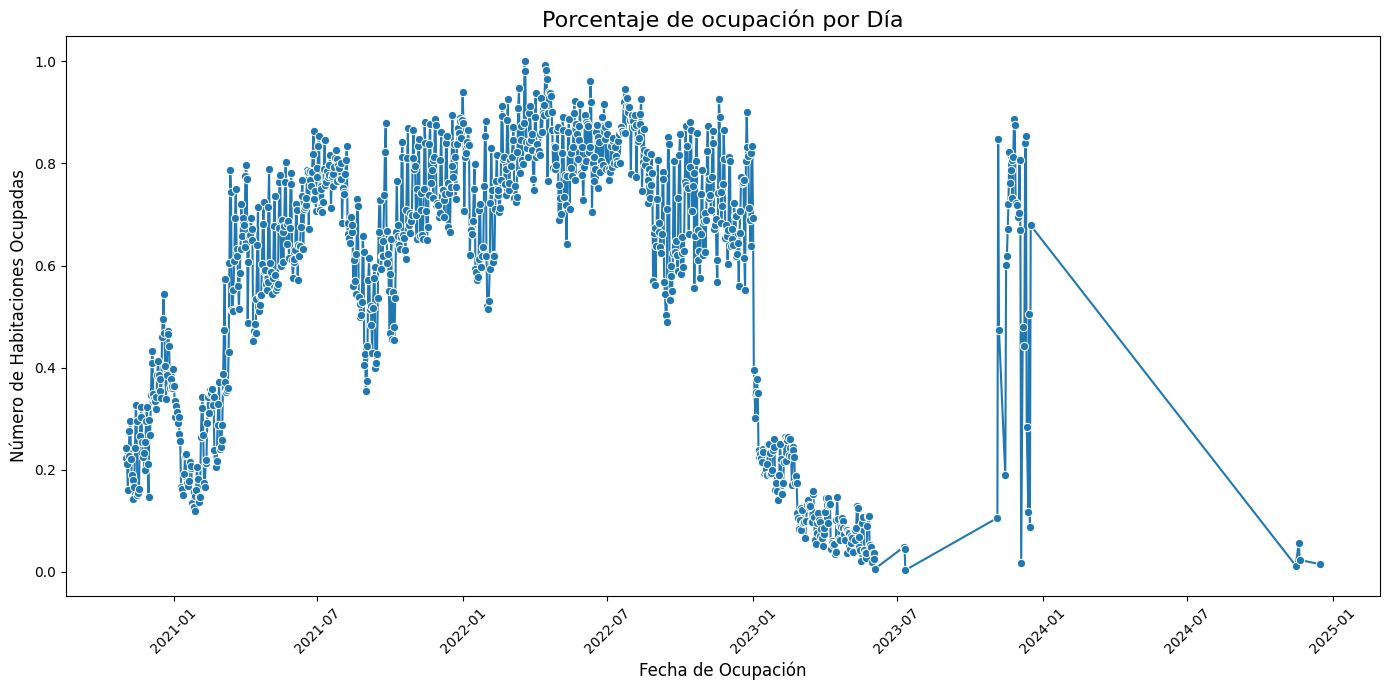

In [35]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=ocupaciones_time_series, x='Fecha_hoy', y='tasa_ocupacion', marker='o')

plt.title('Porcentaje de ocupación por Día', fontsize=16)
plt.xlabel('Fecha de Ocupación', fontsize=12)
plt.ylabel('Número de Habitaciones Ocupadas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [36]:
date_range = pd.date_range(start=ocupaciones_time_series['Fecha_hoy'].min(), end=ocupaciones_time_series['Fecha_hoy'].max(), freq='D')
missing_dates = set(date_range) - set(ocupaciones_time_series['Fecha_hoy'])

complete_time_series = ocupaciones_time_series
if missing_dates:
    print(f"Fechas faltantes en serie de tiempo: {len(missing_dates)}")
    print("\nLlenando fechas con procedimiento forward fill...")
    complete_time_series = pd.DataFrame({'Fecha_hoy': date_range})
    complete_time_series = pd.merge(complete_time_series, ocupaciones_time_series, on='Fecha_hoy', how='left')

    # Forward fill: llenamos las fechas faltantes con el dato anterior
    complete_time_series['cto_noc'] = complete_time_series['cto_noc'].ffill()
    complete_time_series['ing_hab'] = complete_time_series['ing_hab'].ffill()
    complete_time_series['ADR'] = complete_time_series['ADR'].ffill()
    complete_time_series['num_men'] = complete_time_series['num_men'].ffill()
    complete_time_series['num_adu'] = complete_time_series['num_adu'].ffill()

    # Verificación
    missing_dates = complete_time_series[complete_time_series['cto_noc'].isnull()]
    if not missing_dates.empty:
        print(f"Fechas faltantes en la serie de tiempo: {len(missing_dates)}")
    else:
        print("Ya no hay fechas faltantes, la serie de tiempo está completa.")
else:
    print("No hay fechas faltantes, la serie de tiempo es constante.")



Fechas faltantes en serie de tiempo: 521

Llenando fechas con procedimiento forward fill...
Ya no hay fechas faltantes, la serie de tiempo está completa.


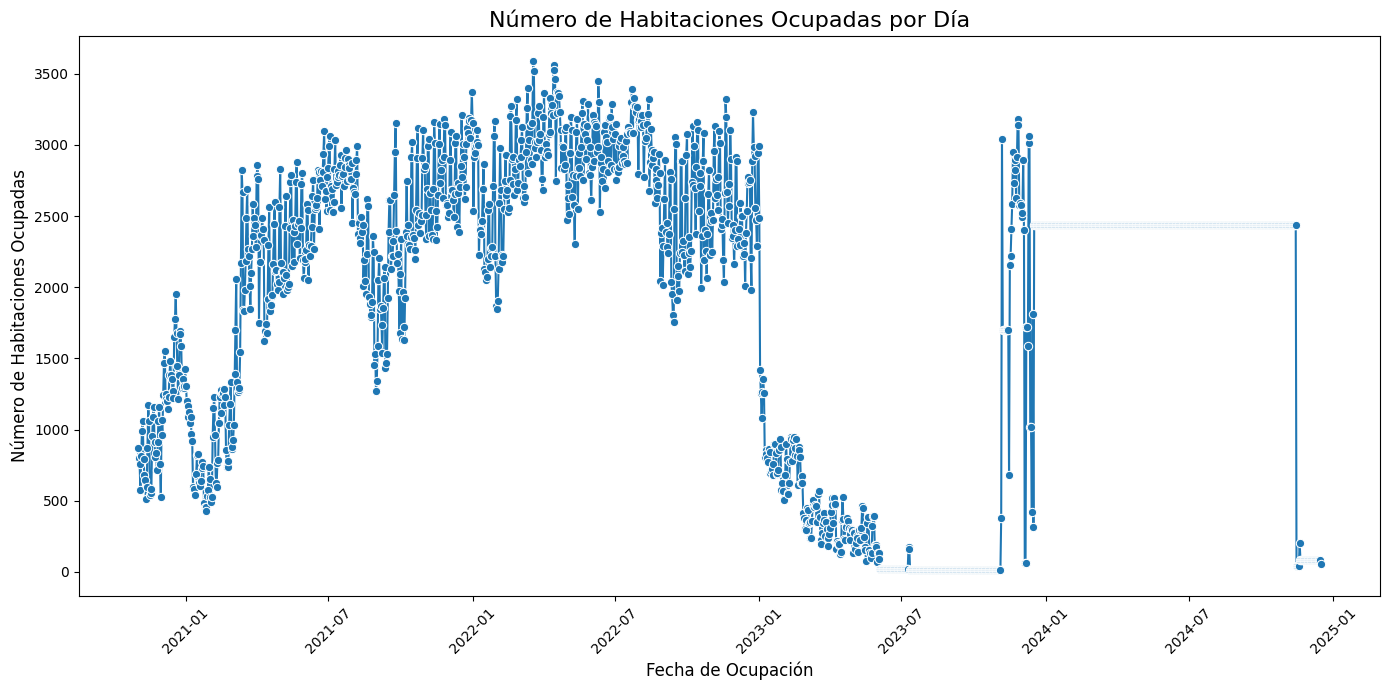

In [37]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=complete_time_series, x='Fecha_hoy', y='cto_noc', marker='o')

plt.title('Número de Habitaciones Ocupadas por Día', fontsize=16)
plt.xlabel('Fecha de Ocupación', fontsize=12)
plt.ylabel('Número de Habitaciones Ocupadas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




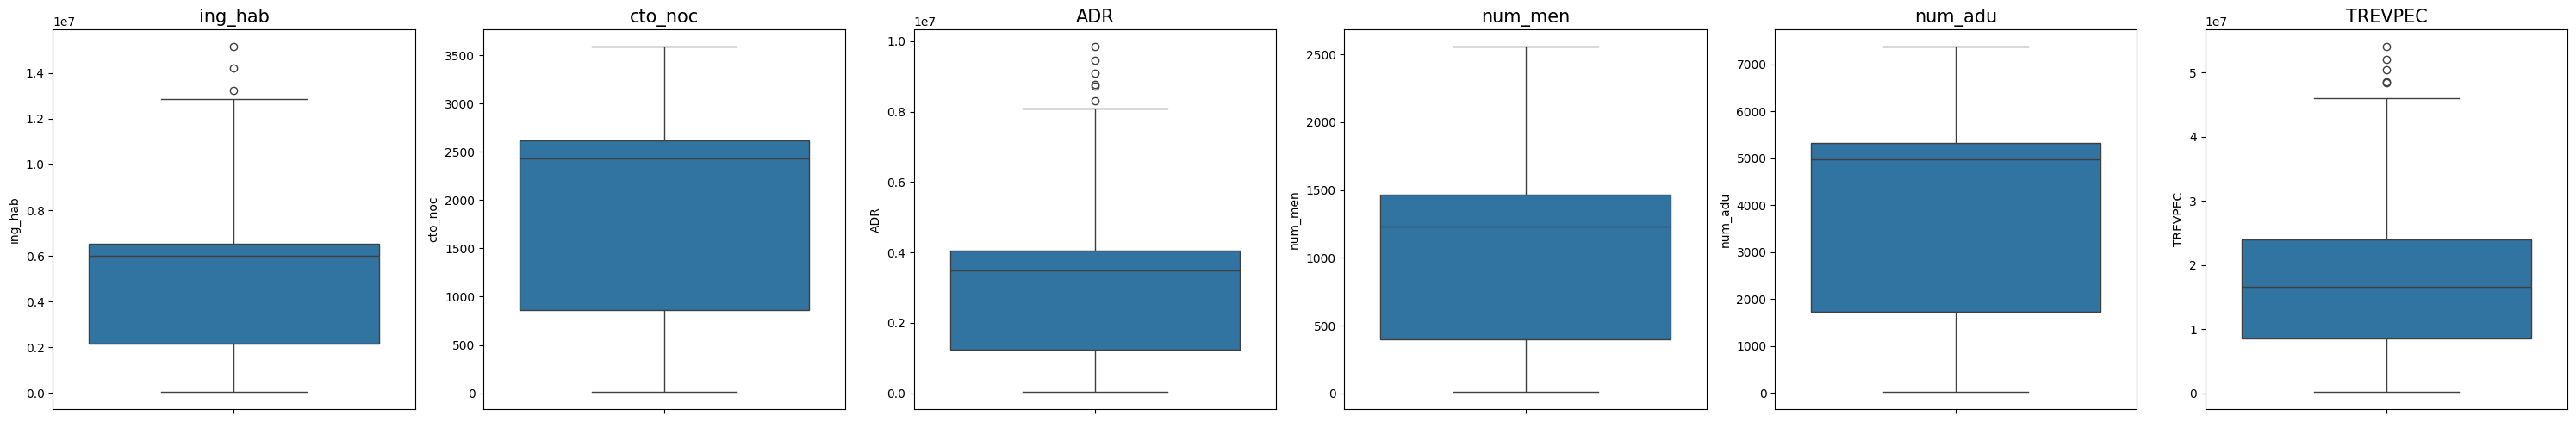

In [38]:
fig, axes = plt.subplots(1, len(metricas), figsize=(len(metricas) * 5, 5))

for i, v in enumerate(metricas):
    g = sns.boxplot(ax=axes[i], y=v, data=complete_time_series)
    g.tick_params()
    g.set_title(v, fontsize=15)

plt.tight_layout()
plt.show()


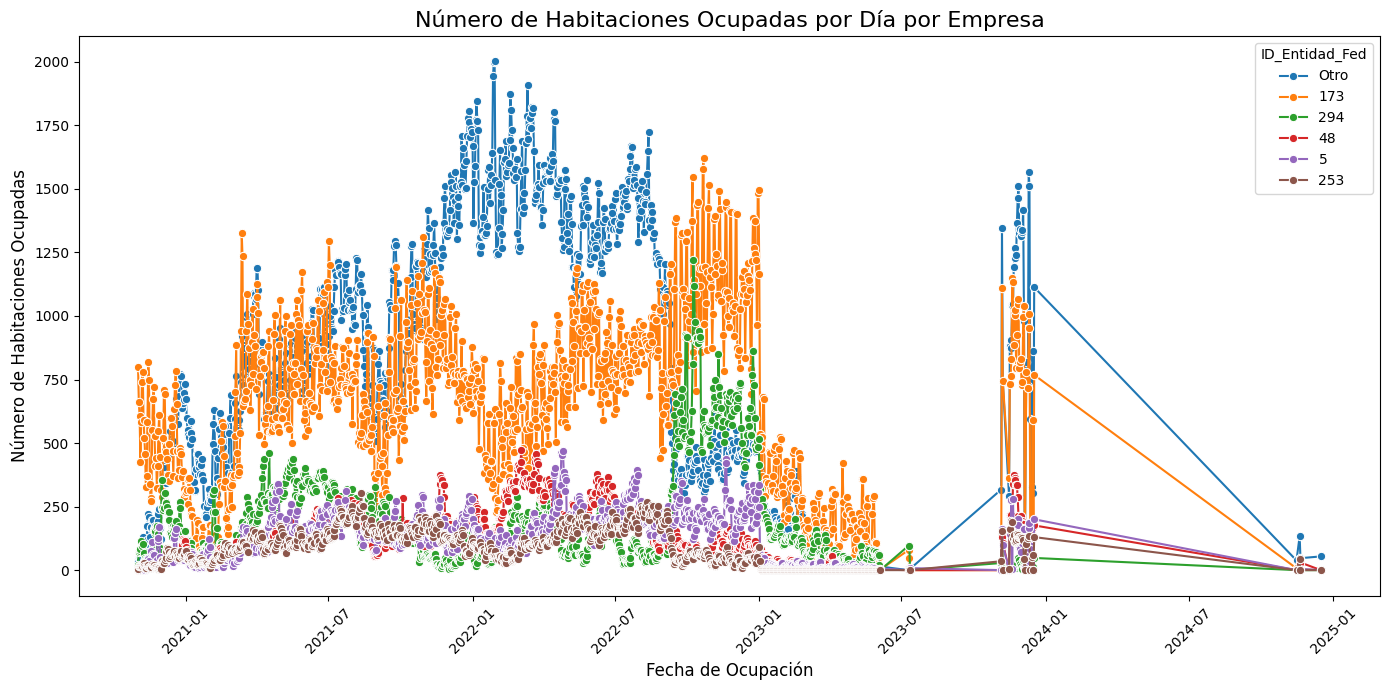

In [45]:
# Crear el rango de fechas completo y realizar un merge para cubrir todas las fechas
complete_time_series_by_entidad = pd.DataFrame({'Fecha_hoy': date_range})
complete_time_series_by_entidad = pd.merge(complete_time_series_by_entidad,
                                             pd.DataFrame({'ID_Entidad_Fed': ['Otro', '173', '294', '48', '5', '253']}),
                                             how='cross')
# Merge con el ocupaciones_time_series_by_empresa
complete_time_series_by_entidad = pd.merge(complete_time_series_by_entidad,
                                             ocupaciones_time_series_by_entidad,
                                             on=['ID_Entidad_Fed', 'Fecha_hoy'],
                                             how='left')


# Graficar por tipo de habitación
plt.figure(figsize=(14, 7))
sns.lineplot(data=complete_time_series_by_entidad, x='Fecha_hoy', y='cto_noc',
             hue='ID_Entidad_Fed', marker='o')

plt.title('Número de Habitaciones Ocupadas por Día por Empresa', fontsize=16)
plt.xlabel('Fecha de Ocupación', fontsize=12)
plt.ylabel('Número de Habitaciones Ocupadas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 3.10 Distribución

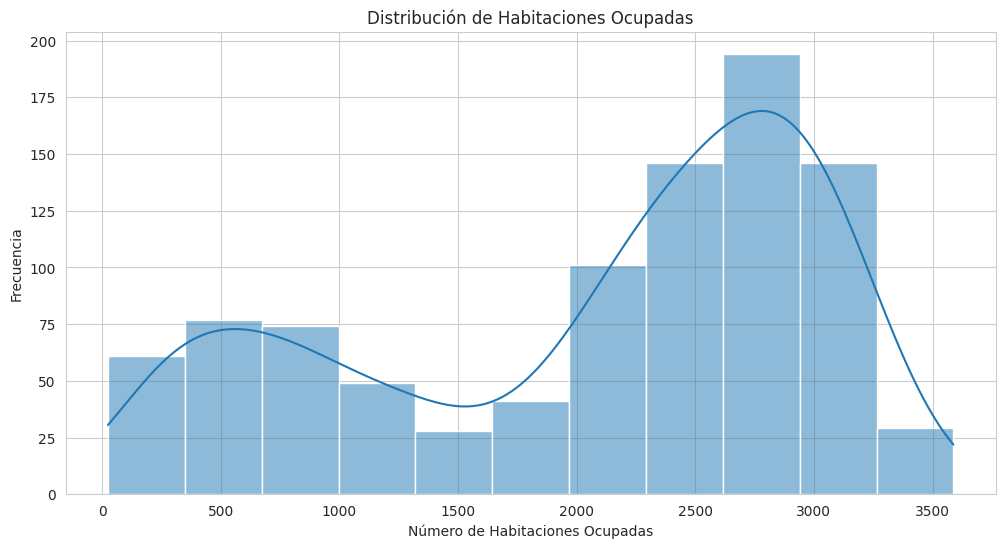

Shapiro-Wilk Test: Statistic=0.8940381527091853, p-value=5.463817258701355e-25
Los datos no siguen una distribución normal.


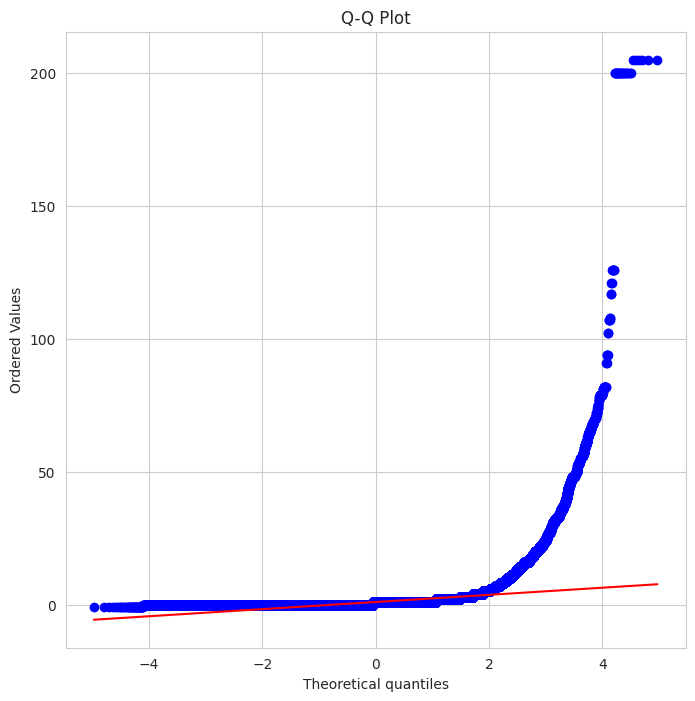

In [63]:
# Histograma y KDE (Kernel Density Estimation) para ver la distribución
plt.figure(figsize=(12, 6))
sns.histplot(complete_time_series['cto_noc'], kde=True)
plt.title('Distribución de Habitaciones Ocupadas')
plt.xlabel('Número de Habitaciones Ocupadas')
plt.ylabel('Frecuencia')
plt.show()

# Prueba de normalidad (Shapiro-Wilk test)
stat, p_value = stats.shapiro(complete_time_series['cto_noc'].dropna())
print(f"Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}")

# Si p-value > 0.05, no hay suficiente evidencia para rechazar la normalidad
if p_value > 0.05:
    print("Los datos siguen una distribución normal.")
else:
    print("Los datos no siguen una distribución normal.")

# Q-Q plot
plt.figure(figsize=(8, 8))
stats.probplot(df['cto_noc'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

#### 3.11 Correlación

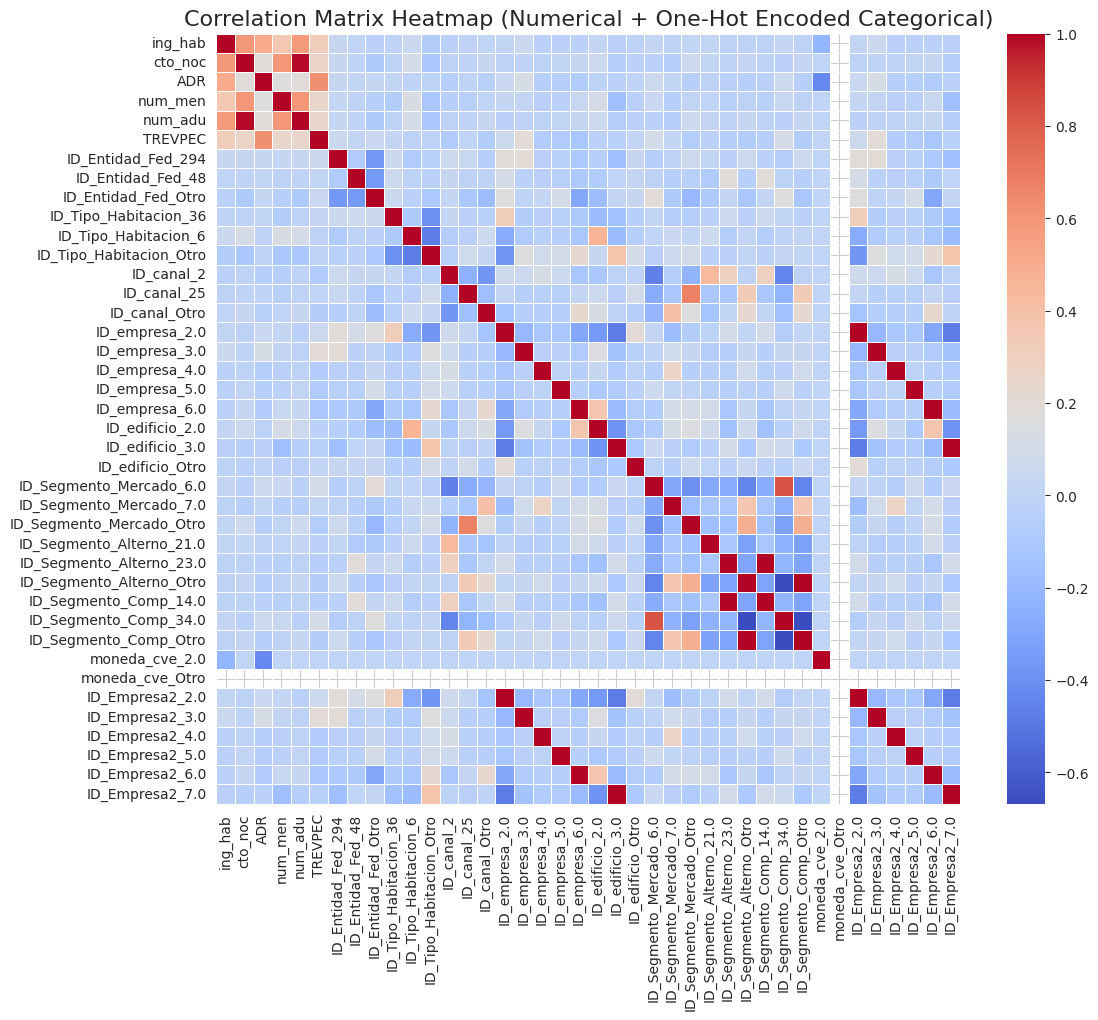

In [65]:
categorical_columns = ['ID_Entidad_Fed', 'ID_Tipo_Habitacion', 'ID_canal',
                       'ID_empresa', 'ID_edificio', 'ID_Segmento_Mercado', 'ID_Segmento_Alterno',
                       'ID_Segmento_Comp', 'moneda_cve', 'ID_Empresa2']


# One-hot encoding for categorical columns (drop first to avoid multicollinearity)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Remove certain columns
columns_to_remove = ['Fecha_hoy']
df_encoded = df_encoded.drop(columns=columns_to_remove)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical + One-Hot Encoded Categorical)", fontsize=16)
plt.show()

#### 3.12 Exportar Datos

In [46]:
# Exportar a excel
# Save both time series to Excel

df.to_csv('../data/ia_ocupaciones_gigante_limpia2.csv', index=False)
complete_time_series.to_excel('../data/ocupaciones_time_seriesN.xlsx', index=False)
complete_time_series_by_entidad.to_excel('../data/ocupaciones_time_series_by_entidad.xlsx', index=False)


In [ ]:
profile_report = ProfileReport(df, title=f"Final Profiling Report {ocupaciones_gigante_name}")
profile_report.to_file(f"Final_Profile_report_{ocupaciones_gigante_name}.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 19/19 [00:16<00:00,  1.17it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Corrección de Ocupaciones
* Usando cto_noc como habitaciones rentadas, salen más habitaciones de las que hay en total en los hoteles, por lo que esta columna no puede significar eso.
* Probaremos tomar cada row como una habitación ocupada




In [74]:
df['count_rows'] = (df['cto_noc'] > 0).astype(int)
ocupaciones_time_series_nueva = df.groupby('Fecha_hoy')[metricas+ ['count_rows']].sum().reset_index()

ocupaciones_time_series_nueva = ocupaciones_time_series_nueva[ocupaciones_time_series_nueva["Fecha_hoy"]<"2023-06-05"]

ocupaciones_time_series_nueva.describe()

Fecha_hoy       ing_hab      cto_noc           ADR  \
count                  946  9.460000e+02   946.000000  9.460000e+02   
mean   2022-02-16 12:00:00  2.839635e+06  2061.904863  1.627690e+06   
min    2020-11-01 00:00:00  5.299371e+04    24.000000  3.769290e+04   
25%    2021-06-25 06:00:00  1.452129e+06  1218.000000  8.539948e+05   
50%    2022-02-16 12:00:00  2.942394e+06  2382.000000  1.621768e+06   
75%    2022-10-10 18:00:00  3.949009e+06  2838.000000  2.361831e+06   
max    2023-06-04 00:00:00  7.964352e+06  3588.000000  5.232507e+06   
std                    NaN  1.519722e+06   971.063718  9.626176e+05   

           num_men      num_adu       TREVPEC   count_rows  
count   946.000000   946.000000  9.460000e+02   946.000000  
mean   1101.607822  4204.939746  1.592357e+06  1113.192389  
min      19.000000    47.000000  3.889081e+04    18.000000  
25%     626.000000  2491.500000  8.148841e+05   626.500000  
50%    1115.000000  4858.000000  1.576786e+06  1291.000000  
75%    1541.500000  5856.000000  2.305293e+06  1636.000000  
max    2556.000000  7378.000000  5.147443e+06  2098.000000  
std     599.177128  1997.729296  9.495742e+05   596.409673

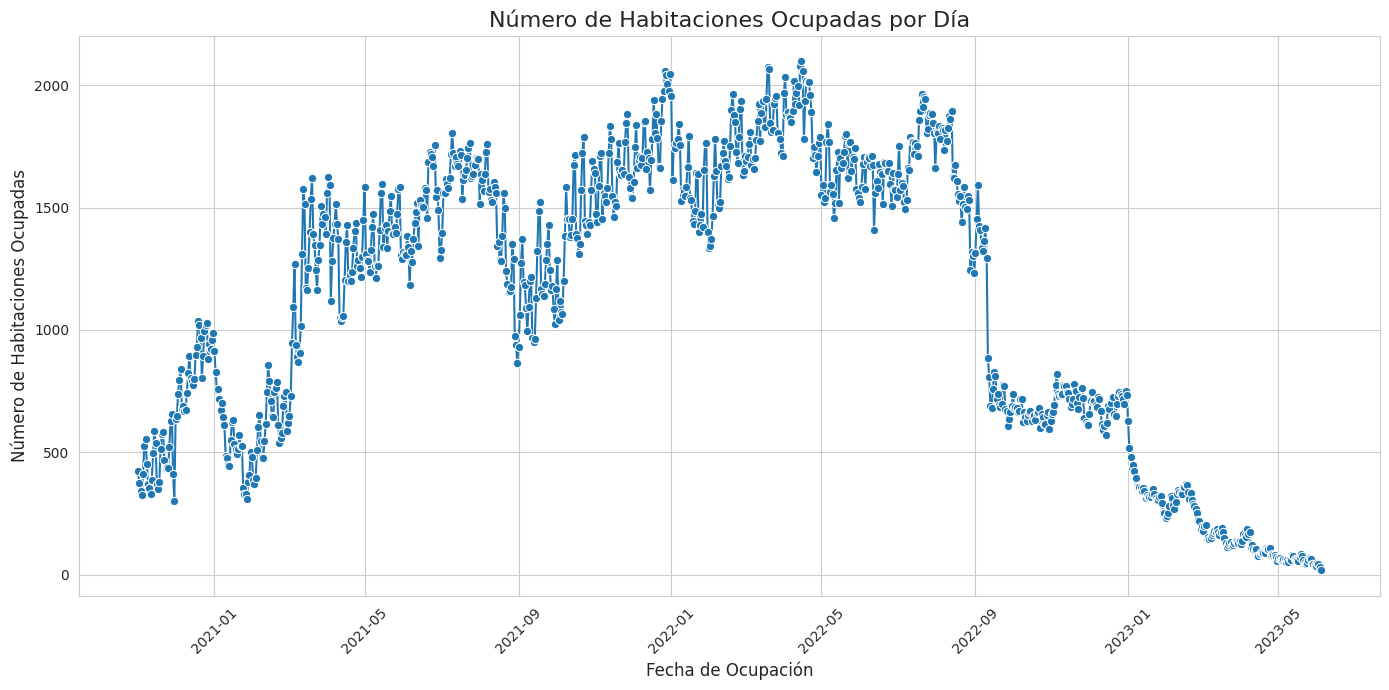

In [75]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=ocupaciones_time_series_nueva, x='Fecha_hoy', y='count_rows', marker='o')

plt.title('Número de Habitaciones Ocupadas por Día', fontsize=16)
plt.xlabel('Fecha de Ocupación', fontsize=12)
plt.ylabel('Número de Habitaciones Ocupadas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [76]:
ocupaciones_time_series_by_empresa_nueva = df.groupby(['ID_empresa', 'Fecha_hoy'])[metricas+ ['count_rows']].sum().reset_index()
ocupaciones_time_series_by_empresa_nueva = ocupaciones_time_series_by_empresa_nueva[ocupaciones_time_series_by_empresa_nueva["Fecha_hoy"]<"2023-06-05"]
ocupaciones_time_series_by_empresa_nueva.describe()

ID_empresa                      Fecha_hoy       ing_hab      cto_noc  \
count  5311.000000                           5311  5.311000e+03  5311.000000   
mean      3.415553  2022-03-17 09:10:40.557333760  5.057984e+05   367.268311   
min       1.000000            2020-11-01 00:00:00  0.000000e+00     0.000000   
25%       2.000000            2021-08-10 00:00:00  1.219934e+04    32.000000   
50%       3.000000            2022-03-19 00:00:00  1.925927e+05   146.000000   
75%       5.000000            2022-10-26 00:00:00  9.412487e+05   684.000000   
max       6.000000            2023-06-04 00:00:00  2.936812e+06  1434.000000   
std       1.706743                            NaN  6.356260e+05   423.295864   

                ADR      num_men      num_adu       TREVPEC   count_rows  
count  5.311000e+03  5311.000000  5311.000000  5.311000e+03  5311.000000  
mean   2.899256e+05   196.219356   748.987573  2.836319e+05   198.282809  
min    0.000000e+00     0.000000     0.000000  0.000000e+00     0.000000  
25%    8.000827e+03     4.000000    66.000000  8.260364e+03    22.000000  
50%    1.037675e+05    60.000000   298.000000  9.827346e+04    60.000000  
75%    4.931543e+05   344.000000  1391.000000  4.857667e+05   312.000000  
max    2.068174e+06  1176.000000  3006.000000  2.103687e+06   878.000000  
std    3.826449e+05   243.216625   865.169803  3.756830e+05   244.017206

In [86]:
# create a dictionary for each ID_empresa time series
empresas_dict = empresas[['ID_empresa', 'Habitaciones_tot']].set_index('ID_empresa').to_dict()['Habitaciones_tot']
time_series_dict = {}
for id_empresa in ocupaciones_time_series_by_empresa_nueva['ID_empresa'].unique():
    time_series_dict[id_empresa] = ocupaciones_time_series_by_empresa_nueva[ocupaciones_time_series_by_empresa_nueva['ID_empresa'] == id_empresa].copy()
    time_series_dict[id_empresa]['tasa_ocupacion'] = time_series_dict[id_empresa]['count_rows'] / empresas_dict[id_empresa]
    display(time_series_dict[id_empresa].head())




ID_empresa  Fecha_hoy        ing_hab  cto_noc            ADR  num_men  \
0         1.0 2020-11-01  900239.512110    846.0  449985.709303    388.0   
1         1.0 2020-11-02  757974.225283    712.0  354586.513943    442.0   
2         1.0 2020-11-03  701831.769511    662.0  309153.064049    380.0   
3         1.0 2020-11-04  514922.429017    470.0  283663.743943    194.0   
4         1.0 2020-11-05  754470.330224    678.0  382988.599887    250.0   

   num_adu        TREVPEC  count_rows  tasa_ocupacion  
0   1692.0  444233.508439         404        0.549660  
1   1428.0  355576.154547         318        0.432653  
2   1330.0  304007.456779         276        0.375510  
3    896.0  285441.459591         260        0.353741  
4   1360.0  363549.439467         334        0.454422

ID_empresa  Fecha_hoy        ing_hab  cto_noc            ADR  num_men  \
986         2.0 2020-12-01  709715.701605    564.0  449571.677893    288.0   
987         2.0 2020-12-02  629129.060475    534.0  450376.181461    340.0   
988         2.0 2020-12-03  663827.634033    564.0  472445.479125    406.0   
989         2.0 2020-12-04  683739.669890    574.0  492957.069414    420.0   
990         2.0 2020-12-05  780259.342776    650.0  523260.215407    518.0   

     num_adu        TREVPEC  count_rows  tasa_ocupacion  
986   1176.0  416764.550032         332        2.634921  
987   1104.0  409440.222720         344        2.730159  
988   1152.0  444068.620308         362        2.873016  
989   1166.0  475766.891972         382        3.031746  
990   1318.0  510562.696134         412        3.269841

ID_empresa  Fecha_hoy        ing_hab  cto_noc           ADR  num_men  \
1942         3.0 2020-11-01   27408.522411     22.0  27408.522411      8.0   
1943         3.0 2020-11-02  110284.254705     90.0  70952.533704     18.0   
1944         3.0 2020-11-03  118570.465028     98.0  75979.232208     20.0   
1945         3.0 2020-11-04  121062.840933    104.0  73451.360205      6.0   
1946         3.0 2020-11-05  163995.229879    138.0  94801.426631      6.0   

      num_adu       TREVPEC  count_rows  tasa_ocupacion  
1942     42.0  27592.940000          20        0.102041  
1943    188.0  70032.909639          58        0.295918  
1944    206.0  72821.794710          64        0.326531  
1945    218.0  67472.476556          64        0.326531  
1946    286.0  89637.289825          78        0.397959

ID_empresa  Fecha_hoy      ing_hab  cto_noc          ADR  num_men  \
2923         4.0 2021-03-01  5696.739231     20.0  5696.739231      0.0   
2924         4.0 2021-03-02  5691.954469     22.0  5057.557846      0.0   
2925         4.0 2021-03-03  3426.894200     16.0  3109.752644      0.0   
2926         4.0 2021-03-04  3425.381570     16.0  3425.381570      0.0   
2927         4.0 2021-03-05  2791.684376     14.0  2791.684376      0.0   

      num_adu      TREVPEC  count_rows  tasa_ocupacion  
2923     42.0  4666.661667          20        0.322581  
2924     44.0  4361.335000          20        0.322581  
2925     28.0  2966.380000          14        0.225806  
2926     30.0  3411.755000          16        0.258065  
2927     24.0  2663.860000          14        0.225806

ID_empresa  Fecha_hoy    ing_hab  cto_noc        ADR  num_men  num_adu  \
3785         5.0 2021-02-01  2836.7640     22.0  2559.2595      0.0     36.0   
3786         5.0 2021-02-02  1915.1475     18.0  1915.1475      0.0     28.0   
3787         5.0 2021-02-03  2844.6390     24.0  2844.6390      0.0     36.0   
3788         5.0 2021-02-04  1228.6785     14.0  1228.6785      0.0     20.0   
3789         5.0 2021-02-05  2221.4325     18.0  2221.4325      0.0     28.0   

      TREVPEC  count_rows  tasa_ocupacion  
3785  2739.07          20        0.185185  
3786  1823.95          18        0.166667  
3787  2949.03          24        0.222222  
3788  1170.17          14        0.129630  
3789  2471.95          16        0.148148

ID_empresa  Fecha_hoy       ing_hab  cto_noc           ADR  num_men  \
4673         6.0 2021-02-28   1655.031000      2.0   1655.031000      2.0   
4674         6.0 2021-03-01  71158.039544    104.0  53503.439822     74.0   
4675         6.0 2021-03-02  88243.282085    126.0  63958.950663     76.0   
4676         6.0 2021-03-03  64445.916015     94.0  55689.808296     60.0   
4677         6.0 2021-03-04  97383.435488    136.0  70137.048046     48.0   

      num_adu       TREVPEC  count_rows  tasa_ocupacion  
4673      4.0   1576.220000           2        0.012987  
4674    206.0  51809.788254          78        0.506494  
4675    250.0  62342.038730          92        0.597403  
4676    182.0  54447.678333          76        0.493506  
4677    274.0  65625.070976          96        0.623377

* Con este approach las empresas (hoteles) 1, 4, 5 tienen tasas de ocupación entre 0 y 100%, mientras que los demás tienen tasas de ocupación erróneas arriba del 100%.

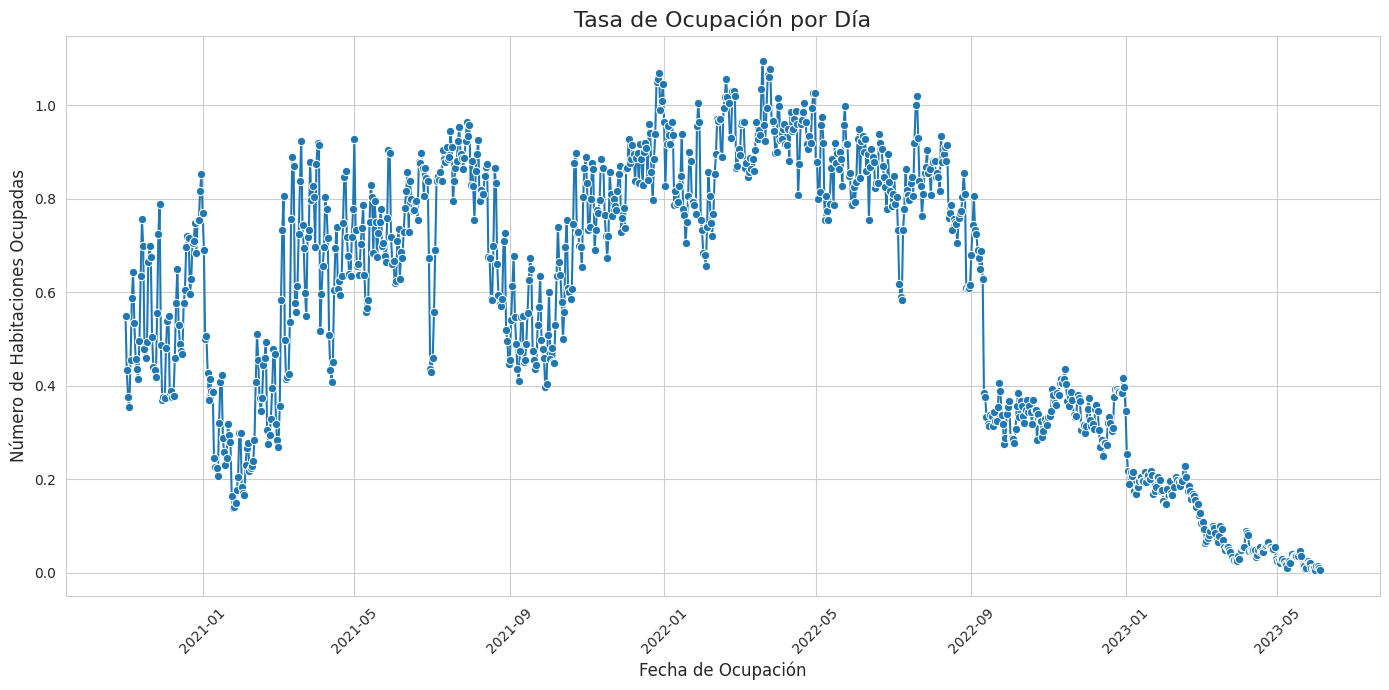

In [100]:

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series_dict[1], x='Fecha_hoy', y='tasa_ocupacion', marker='o')

plt.title('Tasa de Ocupación por Día', fontsize=16)
plt.xlabel('Fecha de Ocupación', fontsize=12)
plt.ylabel('Número de Habitaciones Ocupadas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


